In [4]:
import re
from pyhdf.HDF import *
from pyhdf.SD import *
import numpy as np
import pandas as pd
import glob
import requests
import os, sys
from tqdm import tqdm
def ps_read_hdf_3d(crid, region, param, periodicDim=[]):
    """
    :param crid: An int or float. Carrington Rotation Number.
    :param region: A string, 'corona' or 'helio'.
    :param param: e.g. 'br002' (https://www.predsci.com/mhdweb/data_access.php)
    :param periodicDim: PERIODIC_DIM: Dimension number to be made periodic (0 - 2PI). Valid values are:
            1 - The first dimension. 2 - The second dimension. 3 - The third dimension.
    :return: Dict containing:
            scales1:
                Scale values of the first dimension.
            scales2:
                Scale values of the second dimension.
            scales3:
                Scale values of the third dimension.
            datas:
                Datas
    """
#     path = os.path.join(get_path(),'Data','HCS_data')
#     path += '/cr'+ str(crid) + '/' + region + '/'
    path = os.getcwd()+'/../data/psi_data/corona/'
    # path = '../../Data/HelioMag/cr' + str(crid) + '/' + region + '/'
    filename = param + '.hdf'
    # print(path + filename)
    # print(os.path.exists(path + filename))
#     print(path + filename)
    if not os.path.exists(path + filename):
        ps_load_hdf(crid, region, param)

    sdId = SD(path + filename)
    sdkeys = sdId.datasets().keys()

    scales3 = sdId.select('fakeDim0').get()
    scales2 = sdId.select('fakeDim1').get()
    scales1 = sdId.select('fakeDim2').get()
    datas = sdId.select('Data-Set-2').get()

    sdId.end()

    scales3 = np.array(scales3)
    scales2 = np.array(scales2)
    scales1 = np.array(scales1)
    datas = np.array(datas)

    # Periodic is assumed to have a range from 0 to 2PI
    if type(periodicDim)==int:
        nx = len(scales3)
        ny = len(scales2)
        nz = len(scales1)
        tmpDatas = datas

        if periodicDim == 1:
            scales1 = np.append(scales1, scales1[0] + 2.0 * np.pi)
            datas = np.zeros((nx , ny, nz+1))
            # print(datas.shape)
            datas[:, :, 0:-1] = tmpDatas
            datas[:, :, -1] = tmpDatas[:, :, 0]
        elif periodicDim == 2:
            scales2 = np.append(scales2, scales2[0] + 2.0 * np.pi)
            datas = np.zeros((nx, ny + 1, nz))
            datas[:, 0:- 1, :] = tmpDatas
            datas[:, -1, :] = tmpDatas[:, 0, :]
        elif periodicDim == 3:
            scales3 = np.append(scales3, scales3[0] + 2.0 * np.pi)
            datas = np.zeros((nx+1, ny, nz))
            datas[0:-1, :, :] = tmpDatas
            datas[-1, :, :] = tmpDatas[0, :, :]

    dict = {'scales1': scales1, 'scales2': scales2, 'scales3': scales3, 'datas': datas}

    return dict


def ps_load_hdf(crid, region, param):
    """
    :param crid: An int or float. Carrington Rotation Number.
    :param region: A string, 'corona' or 'helio'.
    :param param: param: e.g. 'br002' (https://www.predsci.com/mhdweb/data_access.php)
    :return: """

    # https://www.predsci.com/data/runs/cr2246-high/hmi_mast_mas_std_0201/corona/
    url = 'https://www.predsci.com/data/runs/'
    url += 'cr' + str(crid) + '-'
#     path = '../../Data/HelioMag/cr' + str(crid)
    path = os.getcwd()+'/psi_data/'
#     print(path)
    try:
        os.mkdir(path)
    except:
        pass

    if str(requests.get(url + 'high/', verify=False)) != '<Response [404]>':
        url += 'high/'
    else:
        print('No High Data, try Medium')
        url += 'medium/'
        if str(requests.get(url, verify=False)) == '<Response [404]>':
            print('Nothing Found!')
            return

    r_links = requests.get(url,verify=False)
    res_url =  r"(?<=href=\").+?(?=\")|(?<=href=\').+?(?=\')"
    links = re.findall(res_url,str(r_links.content),re.I|re.S|re.M)
    l = [s for s in links if 'mas' in s]
    for i in range(len(l)):
        print(i,l[i])
    s=int(input('choose one file: (e.g. 0)'))

    url += l[s] + region + '/'
    path += '/' + region + '/'
    print(path)
    filename = param + '.hdf'
    r = requests.get(url + filename, verify=False, stream=True)
    total = int(r.headers.get('content-length', 0))
    if str(r) != '<Response [404]>':
        try:
            os.mkdir(path)
        except:
            pass
        f = open(path + filename, 'wb')
        bar = tqdm(desc=path + filename, total=total, unit='iB', unit_scale=True, unit_divisor=1024, )
        for data in r.iter_content(chunk_size=1024):
            size = f.write(data)
            bar.update(size)
        f.close

In [6]:
import numpy as np
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
from astropy.time import Time
from sunpy.coordinates import get_body_heliographic_stonyhurst
from astropy.coordinates import SkyCoord
import sunpy.coordinates.frames as frames
import astropy.units as u
import numpy as np
import math
import math
from munch import Munch
import time 
import datetime
import csv
import matplotlib.dates as mdate
import numpy as np
import pandas as pd
import julian
import datetime
import pyflct
from scipy.io import savemat, loadmat
import os
import matplotlib.colors
from scipy.signal import find_peaks
from matplotlib.patches import ConnectionPatch
from reproject import reproject_interp
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import astropy
import astropy.constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord

from sunpy.net import attrs as attrs
import sunpy.map
import sunpy.coordinates.frames as frames

import pfsspy

from pfsspy import tracing

import sunpy

import sunpy.map
import sunpy.data.sample
from sunpy.net import Fido, attrs as a

import warnings
from RBF_B import magnetic_RBF_inter

In [ ]:
"""
@Filename: obtain_mag_line.py
@Aim: read HDF files from PSI (br/bt/bp in corona/helio) and compute the magnetic field line traced back from an initial point to the Sun
@Author: Chuanpeng Hou, Ziqi Wu.
@Date of Last Change: 2022-01-24
@units of PSI data:  see Appendix B of http://shadow.predsci.com/mas/doc/User-Guide.pdf
"""


# from ps_read_hdf_3d import ps_read_hdf_3d


def get_xyz(r, theta, phi):
    """
    :param r: r in Spherical Cordinates, unit: Rs
    :param theta: theta in Spherical Coordinates, unit: rad
    :param phi: phi in Spherical Coordinates, unit: rad
    :return: [x,y,z] in Cartesian Coordinates, unit: [Rs,Rs,Rs]
    """
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    xyz = np.array([x, y, z])
    return xyz


def mag_from_rtp_to_xyz(Br, Bt, Bp, theta, phi):
    """
    :aim: obtain magnetic field vector in Cartesian Coordinates
    :return: Bxyz: magnetic field vector in Cartesian Coordinates
    """
    Bx = Br * np.sin(theta) * np.cos(phi) + Bt * np.cos(theta) * np.cos(phi) - Bp * np.sin(phi)
    By = Br * np.sin(theta) * np.sin(phi) + Bt * np.cos(theta) * np.sin(phi) + Bp * np.cos(phi)
    Bz = Br * np.cos(theta) - Bt * np.sin(theta)
    Bxyz = np.array([Bx, By, Bz])
    return Bxyz


def obtain_B_of_single_point(cr, destination_point):
    """
    :param cr:  Carrington cycle, such as 2246. single value
    :param destination_point: target point vector in Spherical Coordinates. shape: 1D
    :return: magnetic field vector at target point in Spherical Coordinates. shape: 1D
    """
    dict_corona, Br_corona, Bt_corona, Bp_corona = obtain_Brtp_and_grid_coordinate(cr)
    # destination_point = np.array([r_i,theta_i,phi_i])
    r_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales1'] - destination_point[0]))
    theta_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales2'] - destination_point[1]))
    phi_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales3'] - destination_point[2]))
    # print(r_index_of_nearest_point)
    if r_index_of_nearest_point == 0:
        B = [42,42,42]
        dict_corona=42
        print('Current point is beyond the inner boundary!')
        return dict_corona,B
    if r_index_of_nearest_point == len(dict_corona['scales1']) - 1:
        B = [42,42,42]
        dict_corona=42
        print('Current point is beyond the outer boundary!')
        return dict_corona,B
    # print(r_index_of_nearest_point)
    nv = 27
    m = 26
    B = magnetic_RBF_inter(dict_corona['scales1'], dict_corona['scales2'], dict_corona['scales3'],
                           Br_corona, Bt_corona, Bp_corona,
                           destination_point[0], destination_point[1], destination_point[2],
                           nv, m,
                           r_index_of_nearest_point,
                           theta_index_of_nearest_point,
                           phi_index_of_nearest_point)
    return dict_corona,B

def obtain_Vsw_of_single_point(cr, destination_point):
    """
    :param cr:  Carrington cycle, such as 2246. single value
    :param destination_point: target point vector in Spherical Coordinates. shape: 1D
    :return: magnetic field vector at target point in Spherical Coordinates. shape: 1D
    """
    dict_corona, Vswr_corona, Vswt_corona, Vswp_corona = obtain_Vsw_rtp_and_grid_coordinate(cr)
    r_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales1'] - destination_point[0]))
    theta_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales2'] - destination_point[1]))
    phi_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales3'] - destination_point[2]))
#     print('R')
#     print(np.diff(dict_corona['scales1']))
#     print('theta')
#     print(np.diff(dict_corona['scales2']))
#     print('phi')
#     print(np.diff(dict_corona['scales3']))
#     input()
    Vsw = np.array([Vswr_corona[phi_index_of_nearest_point,theta_index_of_nearest_point,r_index_of_nearest_point],
           Vswt_corona[phi_index_of_nearest_point,theta_index_of_nearest_point,r_index_of_nearest_point],
           Vswp_corona[phi_index_of_nearest_point,theta_index_of_nearest_point,r_index_of_nearest_point]])
    return Vsw
def obtain_Va_of_single_point(cr, destination_point):
    """
    :param cr:  Carrington cycle, such as 2246. single value
    :param destination_point: target point vector in Spherical Coordinates. shape: 1D
    :return: magnetic field vector at target point in Spherical Coordinates. shape: 1D
    """
    dict_corona, Va_corona = obtain_Va_and_grid_coordinate(cr)
    r_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales1'] - destination_point[0]))
    theta_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales2'] - destination_point[1]))
    phi_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales3'] - destination_point[2]))

    Va = Va_corona[phi_index_of_nearest_point,theta_index_of_nearest_point,r_index_of_nearest_point]
    return Va


def obtain_Brtp_and_grid_coordinate(cr):
    """
    :aim: load magnetic field vector data for corona and helio
    :param cr: Carrington cycle, such as 2246. single value
    :return:  dict_corona,Br_corona,Bt_corona,Bp_corona,dict_helio,Br_helio,Bt_helio,Bp_helio
    """
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'br002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'br002',3)

    Br_corona = dict_corona['datas']
#     Br_helio = dict_helio['datas']
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'bt002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'bt002',3)
    Bt_corona = dict_corona['datas']
#     Bt_helio = dict_helio['datas']
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'bp002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'bp002',3)
    Bp_corona = dict_corona['datas']
#     Bp_helio = dict_helio['datas']

    return dict_corona, Br_corona, Bt_corona, Bp_corona#, dict_helio, Br_helio, Bt_helio, Bp_helio

def obtain_Vsw_rtp_and_grid_coordinate(cr):
    """
    :aim: load magnetic field vector data for corona and helio
    :param cr: Carrington cycle, such as 2246. single value
    :return:  dict_corona,Br_corona,Bt_corona,Bp_corona,dict_helio,Br_helio,Bt_helio,Bp_helio
    """
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'vr002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'br002',3)

    Vswr_corona = dict_corona['datas']
#     Br_helio = dict_helio['datas']
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'vt002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'bt002',3)
    Vswt_corona = dict_corona['datas']
#     Bt_helio = dict_helio['datas']
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'vp002',3)
#     dict_helio = ps_read_hdf_3d(cr, 'helio', 'bp002',3)
    Vswp_corona = dict_corona['datas']
#     Bp_helio = dict_helio['datas']

    return dict_corona, Vswr_corona, Vswt_corona, Vswp_corona#, dict_helio, Br_helio, Bt_helio, Bp_helio
def obtain_Va_and_grid_coordinate(cr):
    """
    :aim: load magnetic field vector data for corona and helio
    :param cr: Carrington cycle, such as 2246. single value
    :return:  dict_corona,Br_corona,Bt_corona,Bp_corona,dict_helio,Br_helio,Bt_helio,Bp_helio
    """
    dict_corona = ps_read_hdf_3d(cr, 'corona', 'va002',3)
    Va_corona = dict_corona['datas']

    return dict_corona, Va_corona#, dict_helio, Br_helio, Bt_helio, Bp_helio


def obtain_position_of_next_point(current_pos, step, current_B):
    """
    :param current_pos: current position in Spherical Coordinates. shape: 1D
    :param step: step length unit: Rs. single value
    :param current_B:current magnetic field vector in Spherical Coordinates. shape: 1D
    :return: magnetic field vector at next position in Spherical Coordinates. shape: 1D
    """
    current_pos_in_xyz = get_xyz(current_pos[0], current_pos[1], current_pos[2])
    current_B_in_xyz = mag_from_rtp_to_xyz(current_B[0], current_B[1], current_B[2],
                                           current_pos[1], current_pos[2])
    current_B_amp = np.sqrt(current_B_in_xyz[0] ** 2 + current_B_in_xyz[1] ** 2 + current_B_in_xyz[2] ** 2)
    if current_B[0] > 0:
        next_pos_in_xyz = current_pos_in_xyz + step * current_B_in_xyz / current_B_amp
        next_pos = get_rtp(next_pos_in_xyz)
    else:
        next_pos_in_xyz = current_pos_in_xyz - step * current_B_in_xyz / current_B_amp
        next_pos = get_rtp(next_pos_in_xyz)
    return next_pos


def get_rtp(old_data_in_xyz):
    """
    :param old_data_in_xyz: [x,y,z] in Cartesian Cordinates, unit: Rs
    :return: data_in_rtf: [r,theta,phi] in Spherical Cordinates, unit: [Rs,rad,rad]
    """
    x = old_data_in_xyz[0]
    y = old_data_in_xyz[1]
    z = old_data_in_xyz[2]
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(z / r)
    if x > 0 and y > 0:
        phi = np.arcsin(y / np.sqrt(x ** 2 + y ** 2))
    elif x < 0 and y > 0:
        phi = np.arccos(x / np.sqrt(x ** 2 + y ** 2))
    elif x < 0 and y < 0:
        phi = np.pi - np.arcsin(y / np.sqrt(x ** 2 + y ** 2))
    else:
        phi = 2 * np.pi + np.arcsin(y / np.sqrt(x ** 2 + y ** 2))
    data_in_rtf = np.array([r, theta, phi])
    return data_in_rtf

def Carrington_To_Helioprojective_earth(carr_lon, carr_lat, obstime):
    Carrington_lon_lat = SkyCoord(lon=carr_lon * u.deg, lat=carr_lat * u.deg, \
                                  frame=frames.HeliographicCarrington, obstime=obstime, observer="earth")
    helioprojective = Carrington_lon_lat.transform_to(frames.Helioprojective(observer="earth"))
    x_arcsec = helioprojective.Tx.value
    y_arcsec = helioprojective.Ty.value
    return x_arcsec, y_arcsec
def obtain_mag_line(cr, initial_pos, maxnum=100):
    """

    :param cr: Carrington Rotation Number
    :param initial_pos: [r(Rs),lat(rad),lon(rad)] in Carrington Coordinates
    :param step: dx(Rs)
    :param maxnum: maximum steps
    :return: pos_r_of_mag_line (Rs), pos_t_of_mag_line (rad), pos_p_of_mag_line (rad),
    Br_of_mag_line (CU), Bt_of_mag_line (CU), Bp_of_mag_line (CU): position vector and magnetic field vector along a magnetic field line
    """
    dict_corona,current_B = obtain_B_of_single_point(cr, initial_pos)
    current_Vsw = obtain_Vsw_of_single_point(cr, initial_pos)
    current_Va = obtain_Va_of_single_point(cr, initial_pos)
    current_pos = initial_pos
    r_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales1'] - current_pos[0]))
    step = np.abs(dict_corona['scales1'][r_index_of_nearest_point] - dict_corona['scales1'][r_index_of_nearest_point+1]) #/2.
    print(step, end=', ')
    pos_r_of_mag_line = np.array([current_pos[0]])  # unit:Rs
    pos_t_of_mag_line = np.array([current_pos[1]])  # unit:rad
    pos_p_of_mag_line = np.array([current_pos[2]])  # unit:rad
    Br_of_mag_line = np.array([current_B[0]])  # unit:cu
    Bt_of_mag_line = np.array([current_B[1]])  # unit:cu
    Bp_of_mag_line = np.array([current_B[2]])  # unit:cu
    Vswr_of_mag_line = np.array([current_Vsw[0]])  # unit:cu
#     Vswt_of_mag_line = np.array([current_Vsw[1]])  # unit:cu
#     Vswp_of_mag_line = np.array([current_Vsw[2]])  # unit:cu
    Va_of_mag_line = np.array([current_Va])
    num = 0
    while not current_B[0] == 42 and num <= maxnum:  # 等于42表示到了内边界， num限制步数
        try:
            next_pos = obtain_position_of_next_point(current_pos, step, current_B)
            
            dict_corona,next_B = obtain_B_of_single_point(cr, next_pos)
            next_Vsw = obtain_Vsw_of_single_point(cr, next_pos)
            next_Va = obtain_Va_of_single_point(cr, next_pos)
            pos_r_of_mag_line = np.append(pos_r_of_mag_line, next_pos[0])
            pos_t_of_mag_line = np.append(pos_t_of_mag_line, next_pos[1])
            pos_p_of_mag_line = np.append(pos_p_of_mag_line, next_pos[2])
            Br_of_mag_line = np.append(Br_of_mag_line, next_B[0])
            Bt_of_mag_line = np.append(Bt_of_mag_line, next_B[1])
            Bp_of_mag_line = np.append(Bp_of_mag_line, next_B[2])
            Vswr_of_mag_line = np.append(Vswr_of_mag_line, next_Vsw[0])
            Va_of_mag_line = np.append(Va_of_mag_line, next_Va)
            
            current_pos = next_pos
            current_B = next_B
            r_index_of_nearest_point = np.argmin(np.abs(dict_corona['scales1'] - current_pos[0]))
            step = np.abs(dict_corona['scales1'][r_index_of_nearest_point] - dict_corona['scales1'][r_index_of_nearest_point+1]) # /2.
            num = num + 1
            if current_pos[0] > 28:
                current_B[0] = 42
        except (Exception,BaseException) as e:
            print('Error occured at step next_B = ',next_B,'. Stop tracing.')

    return pos_r_of_mag_line, pos_t_of_mag_line, pos_p_of_mag_line, Br_of_mag_line, Bt_of_mag_line, Bp_of_mag_line,Vswr_of_mag_line,Va_of_mag_line


def plot_mag_lines(crid, pos, maxnum, rotation=0):
    """
    :param crid: Carrington Rotation Number
    :param pos: [r(Rs),lat(rad),lon(rad)] in Carrington Coordinates
    :param step: dx(Rs)
    :param maxnum: maximum steps
    :param rotation: rotate around z axis centered at (0,0,0), Anti-clockwise.
    :return:  A trace (go.Scatter3d(mode='lines')) for plotly
    """
    mag_r, mag_t, mag_p, mag_br, mag_bt, mag_bp,Vswr,Va = obtain_mag_line(crid, pos, maxnum)
    mag_p += np.deg2rad(rotation)
    mag_x = mag_r * np.cos(mag_p) * np.sin(mag_t)
    mag_y = mag_r * np.sin(mag_p) * np.sin(mag_t)
    mag_z = mag_r * np.cos(mag_t)
#     print('mag_r: ',mag_r)
#     print('**************')
#     print('mag_t: ',mag_t/np.pi*180)
#     print('**************')
#     print('mag_p: ',mag_p/np.pi*180)
    
    trace = go.Scatter3d(x=mag_x, y=mag_y, z=mag_z,
                         mode='lines',
                         line=dict(color='black',
                                   width=5)
                         )
    return trace,mag_r,mag_t, mag_p,Vswr,Va


if __name__ == '__main__':
    cr = 2263
    # load AIA map files.
#     data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
#     dir_and_filename = data_dir +'10min_files_of_AIA_map.mat'
#     files = loadmat(dir_and_filename)['files'][0][0][0]
#     files.sort()
#     AIA_map_sequence = sunpy.map.Map(list(files), sequence=True)
#     num_of_AIA_map = len(AIA_map_sequence)
    
    # load bright point information.
    data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
    dir_and_filename = data_dir +'10min_information_of_bright_points.mat'
    data = loadmat(dir_and_filename)
    new_BP = data['information_of_new_bright_points_for_each_frame_arr'][0]
#     disappeared_BP = data['information_of_disappearing_bright_points_for_each_frame_arr'][0]
#     information_of_bright_points.number = number_of_bright_points
#     information_of_bright_points.obsdate = bright_points_obsdate_arr
#     information_of_bright_points.x = bright_points_position_x_arr
#     information_of_bright_points.y = bright_points_position_y_arr
#     information_of_bright_points.x_arcsec = bright_points_position_x_arcsec_arr
#     information_of_bright_points.y_arcsec = bright_points_position_y_arcsec_arr
#     information_of_bright_points.lon = bright_points_position_lon_arr
#     information_of_bright_points.lat = bright_points_position_lat_arr
#     information_of_bright_points.radius = bright_points_position_radius_arr
    num_of_maps = new_BP.size
    current_num = 0
    start = time.perf_counter()
    bright_points_arr = np.array([])
    for event_num in range(num_of_maps):
        print(r'event_num: ', event_num, end = ", ")
        for idx_bp_in_each_frame in range(new_BP[event_num]['number'][0][0][0][0]):
            if current_num % 1 == 0: #20 # 每20个亮点做一次trace
                obstime = new_BP[event_num]['obsdate'][0][0][idx_bp_in_each_frame]
                x = new_BP[event_num]['x'][0][0][0][idx_bp_in_each_frame]
                y = new_BP[event_num]['y'][0][0][0][idx_bp_in_each_frame]
                x_arcsec = new_BP[event_num]['x_arcsec'][0][0][0][idx_bp_in_each_frame]
                y_arcsec = new_BP[event_num]['y_arcsec'][0][0][0][idx_bp_in_each_frame]
                lon = new_BP[event_num]['lon'][0][0][0][idx_bp_in_each_frame]
                lat = new_BP[event_num]['lat'][0][0][0][idx_bp_in_each_frame]
                radius = new_BP[event_num]['radius'][0][0][0][idx_bp_in_each_frame]

                r_i = 1.2
                theta_i = (90 - lat) / 180 * np.pi
                phi_i = lon / 180 * np.pi
                initial_pos = np.array([r_i, theta_i, phi_i])
                
                maxnum = 150 # maximum of step
                mag_r, mag_t, mag_p, mag_br, mag_bt, mag_bp, Vswr, Va = obtain_mag_line(cr, initial_pos, maxnum)
                
                mag_amplitude = np.sqrt(mag_br**2 + mag_bt**2 + mag_bp**2)
                expansion_factor = mag_amplitude / mag_amplitude[-1]
                
                Vjet = Vswr + Va

                bright_points = Munch()

                bright_points.event_num = event_num
                bright_points.idx_bp_in_each_frame = idx_bp_in_each_frame

                bright_points.obstime = obstime
                bright_points.radius = radius

                bright_points.x = x
                bright_points.y = y

                bright_points.x_arcsec = x_arcsec
                bright_points.y_arcsec = y_arcsec

                bright_points.r = mag_r
                bright_points.t = mag_t
                bright_points.p = mag_p

                bright_points.br = mag_br
                bright_points.bt = mag_bt
                bright_points.bp = mag_bp

                bright_points.Vswr = Vswr
                bright_points.Va = Va
                bright_points.Vjet = Vjet
                
                bright_points.expansion_factor = expansion_factor 

                bright_points_arr = np.append(bright_points_arr, bright_points) 

            current_num = current_num + 1
        dur = time.perf_counter() - start
        print(r"during [s]: ", dur)
data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
mdict = {'bright_points_arr': bright_points_arr}
dir_and_filename = data_dir +'(upto_28Rs)PSI_trace_from_bright_points_arr.mat'
savemat(dir_and_filename, mdict)     
        

In [20]:
from scipy.io import savemat, loadmat
import os
data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
dir_and_filename = data_dir +'(upto_28Rs)PSI_trace_from_bright_points_arr.mat'
data_trace_from_bright_point=loadmat(dir_and_filename)     

In [21]:
bright_points_arr = data_trace_from_bright_point['bright_points_arr'][0]

In [36]:
bright_points_arr[10]['Vswr'][0][0][0]

array([0.00709829, 0.00736548, 0.00766581, 0.00800186, 0.00837713,
       0.00879602, 0.00864577, 0.00930325, 0.00930325, 0.00937396,
       0.01004342, 0.01078168, 0.01159396, 0.01248641, 0.01346592,
       0.01454024, 0.01571854, 0.01701042, 0.01842666, 0.01997845,
       0.02167722, 0.02353488, 0.02556426, 0.02777844, 0.03128   ,
       0.03131343, 0.03412112, 0.03714196, 0.04037226, 0.04381692,
       0.04747324, 0.05134194, 0.05541932, 0.05970757, 0.06420382,
       0.06890399, 0.07380329, 0.07889652, 0.08417815, 0.08964177,
       0.09102847, 0.09405521, 0.10003893, 0.10620976, 0.1125583 ,
       0.1190745 , 0.12574768, 0.13256682, 0.13952076, 0.14659855,
       0.15378991, 0.16108513, 0.16847502, 0.17595097, 0.18350518,
       0.19113058, 0.19882058, 0.20254073, 0.21052177, 0.21855709,
       0.22664134, 0.23215471, 0.24051709, 0.24892069, 0.25736162,
       0.26583663, 0.27434301, 0.28287864, 0.29144183, 0.30003142,
       0.3086465 , 0.31728664, 0.32595164, 0.33464164, 0.34335

In [43]:
from_rs_to_km = 6.95e5
t_arr = np.array([])
i=0
for idx in range(0,length,1):
    r = bright_points_arr[idx]['r'][0][0][0] * from_rs_to_km
    v = bright_points_arr[idx]['Vjet'][0][0][0] * from_cu_to_mks
#     print(r[-1]/from_rs_to_km)
    t = np.sum(np.diff(r)/v[:-1])/3600 + (0.37*214.9*from_rs_to_km-r[-1])/v[-1]/3600
    if np.abs(t)<100:
        t_arr = np.append(t_arr,t)
        print(np.mean(t))
    else:
        i = i+1
print(np.mean(t_arr))
print(i)

20.783043949516582
25.575978230787285
26.67562380888547
23.116330396156
24.370650221201153
22.02086853824011
25.634324671325878
20.89775554194732
37.32124905693221
20.83310962688967
20.82073197388008
39.04127417135778
24.564621376403995
20.9806853373699
20.79942522419051
37.31068995976197
26.011457966849246
28.280619084064263
20.821327589229412
28.539067319680715
21.38260855255431
35.71243812105835
28.769185756669906
25.276634161226717
22.338728452590146
20.81932892733302
22.303347272017298
27.241509092251214
20.807199855707502
20.985031364840598
20.779210658442956
20.77601362976027
25.02273438970047
23.634964168034028
25.440071546793803
28.633140488467596
25.188996732723822
24.97097235993575
20.812028949755266
20.74639180333309
20.820512672127442
28.79649266352509
25.131884201396456
24.20977064546332
27.528625658940523
20.731346792072685
22.399014342581506
21.88297221061088
25.403246827892634
21.903561474567958
21.84003890271481
23.56274512818818
21.788748234872063
34.19221074454232
2

**画图**

length_of_bright_points_arr:  249


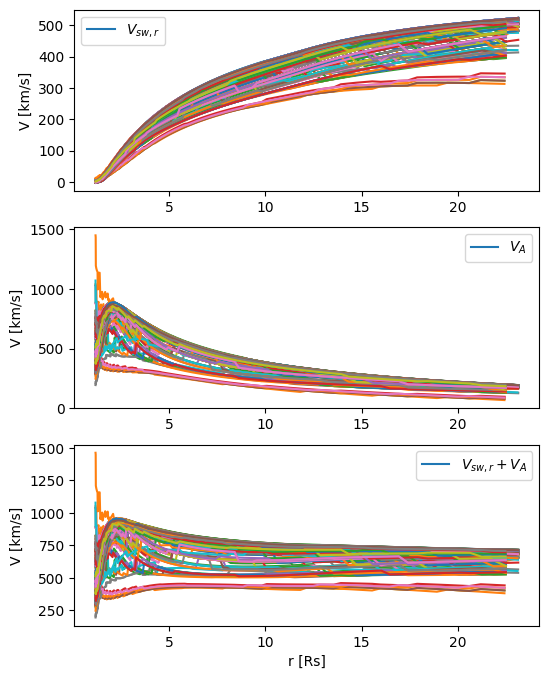

In [7]:
fig = plt.figure(figsize=(6,8))
# speed profile 
plt.subplot(3,1,1)
from_cu_to_mks = 481.3711 # km/s
length = bright_points_arr.size
print('length_of_bright_points_arr: ', length)
for idx in range(0,length,1):
    if bright_points_arr[idx]['r'][0][0][0][-1]>2.0:
        plt.plot(bright_points_arr[idx]['r'][0][0][0], bright_points_arr[idx]['Vswr'][0][0][0] * from_cu_to_mks)
plt.legend([r'$V_{sw,r}$'])
plt.ylabel('V [km/s]')

plt.subplot(3,1,2)  
from_cu_to_mks = 481.3711 # km/s
length = bright_points_arr.size
for idx in range(0,length,1):
    if bright_points_arr[idx]['r'][0][0][0][-1]>2.0:
        plt.plot(bright_points_arr[idx]['r'][0][0][0], bright_points_arr[idx]['Va'][0][0][0] * from_cu_to_mks)
plt.legend([r'$V_{A}$'])
plt.ylabel('V [km/s]')

plt.subplot(3,1,3)    
from_cu_to_mks = 481.3711 # km/s
length = bright_points_arr.size
for idx in range(0,length,1):
    if bright_points_arr[idx]['r'][0][0][0][-1]>2.0:
        plt.plot(bright_points_arr[idx]['r'][0][0][0], bright_points_arr[idx]['Vjet'][0][0][0] * from_cu_to_mks) 
plt.xlabel('r [Rs]')
plt.ylabel('V [km/s]')
plt.legend([r'$V_{sw,r}+V_{A}$'])




In [ ]:
plt.close()
from_cu_to_G = 2.2068908 # G
length = bright_points_arr.size
num=0
print('length_of_bright_points_arr: ', length)
for idx in range(0,length,1):
    if bright_points_arr[idx]['r'][0][0][0][-1]>20:
        idx_r5 = np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0] - 5))
        mag_amplitude = np.sqrt(bright_points_arr[idx]['br'][0][0][0] **2 + bright_points_arr[idx]['bt'][0][0][0] **2 + bright_points_arr[idx]['bp'][0][0][0] **2)
#         plt.plot(bright_points_arr[idx].r, mag_amplitude/mag_amplitude[idx_r5]*1.2**2/5**2)
        plt.plot(bright_points_arr[idx]['r'][0][0][0], mag_amplitude*bright_points_arr[idx]['r'][0][0][0]**2)
        num = num+1
# plt.legend([r'$B$'])
plt.xlabel(r'r [Rs]')
plt.ylabel(r'$B *r^2 \quad[G*Rs^2]$')
print(num)

In [ ]:
np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0] - 5))

In [ ]:
bright_points_arr[idx]['r'][0][0][0][93]

In [ ]:
fig = plt.figure(figsize=(6,8))
# speed profile 
plt.subplot(3,1,1)
from_cu_to_G = 2.2068908 # G
length = bright_points_arr.size
print('length_of_bright_points_arr: ', length)
for idx in range(0,length,1):
    if bright_points_arr[idx].r[-1]>2.0:
        plt.plot(bright_points_arr[idx].r, bright_points_arr[idx].br * from_cu_to_G)
plt.legend([r'$B_{r}$'])
plt.ylabel('B [G]')

plt.subplot(3,1,2)  
from_cu_to_mks = 2.2068908 # G
length = bright_points_arr.size
for idx in range(0,length,1):
    if bright_points_arr[idx].r[-1]>2.0:
        plt.plot(bright_points_arr[idx].r, bright_points_arr[idx].bt * from_cu_to_G)
plt.legend([r'$B_{\theta}$'])
plt.ylabel('B [G]')

plt.subplot(3,1,3)    
from_cu_to_mks = 2.2068908 # G
length = bright_points_arr.size
for idx in range(0,length,1):
    if bright_points_arr[idx].r[-1]>2.0:
        plt.plot(bright_points_arr[idx].r, bright_points_arr[idx].bp * from_cu_to_G) 
plt.xlabel('r [Rs]')
plt.ylabel('B [G]')
plt.legend([r'$B_{\phi}$'])

In [ ]:
fig = plt.figure(figsize=(8,6))

length = bright_points_arr.size
rad2deg = 1.0/np.pi*180
print('length_of_bright_points_arr: ', length)
# for idx in range(0,length,1):
#     idx_r20 = np.argmin(np.abs(bright_points_arr[idx].r-5))
#     plt.scatter(bright_points_arr[idx].p[0] * rad2deg, 90 - bright_points_arr[idx].t[0] * rad2deg, color='black')
#     plt.scatter(bright_points_arr[idx].p[idx_r20] * rad2deg, 90 - bright_points_arr[idx].t[idx_r20] * rad2deg, color='red')
for idx in range(0,length,1):
    idx_r20 = np.argmin(np.abs(bright_points_arr[idx].r-20))
    plt.scatter(bright_points_arr[idx].p[0] * rad2deg, 90 - bright_points_arr[idx].t[0] * rad2deg, color='black')
    plt.scatter(bright_points_arr[idx].p[idx_r20] * rad2deg, 90 - bright_points_arr[idx].t[idx_r20] * rad2deg, color='blue')

plt.legend(['brigh points on solar surface','position tracing to source surface'])
plt.xlabel('Carrinton longitude [degree]')
plt.ylabel('Carrinton latitude [degree]')

In [84]:
%matplotlib notebook
# scatter figure
from datetime import datetime

def get_deltatime(bright_points):
    from_cu_to_mks = 481.3711 # km/s
    from_Rs_to_km = 6.95e5
    r_arr = bright_points['r'][0][0][0] * from_Rs_to_km
    Vswr_arr = bright_points['Vswr'][0][0][0] * from_cu_to_mks
    Va_arr = bright_points['Va'][0][0][0] * from_cu_to_mks
    V_jet = Vswr_arr + Va_arr
    dt_arr = np.diff(r_arr) / V_jet[:-1]
    idx_r20 = np.argmin(np.abs(bright_points['r'][0][0][0]-20))
    delta_time = np.nansum(dt_arr[0:idx_r20+1]) # unit: seconds

    return delta_time

from_cu_to_mks = 481.3711 # km/s
from_arcsec_to_deg = 0.2697 * np.sqrt(6.1)   # moldify expansion factor with np.sqrt(6.1)
length = bright_points_arr.size
print('length_of_bright_points_arr: ', length)
obstime_bright_arr = np.array([])
datetime_bright_at_ss_arr = np.array([])
datetime_bright_at_solar_surface_arr = np.array([])
lon_bright_at_SS_arr = np.array([])
lat_bright_at_SS_arr = np.array([])
radius_bright_at_SS_arr = np.array([])
expansion_factor_bright_arr = np.array([])
for idx in range(0,length,1):
    if bright_points_arr[idx]['r'][0][0][0][-1]>20:
        idx_r20 = np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0]-20))
        obstime_bright_arr = np.append(obstime_bright_arr, bright_points_arr[idx]['obstime'][0][0][0] )
        delta_time_from_solar_surface_to_source_surface = get_deltatime(bright_points_arr[idx])
        datetime_bright_at_solar_surface = julian.from_jd(0 + julian.to_jd(datetime.strptime(bright_points_arr[idx]['obstime'][0][0][0].strip(), '%Y-%m-%dT%H:%M:%S.%f')))
        time_at_ss = delta_time_from_solar_surface_to_source_surface / 86400  + julian.to_jd(datetime_bright_at_solar_surface)
        datetime_bright_at_ss_arr = np.append(datetime_bright_at_ss_arr, julian.from_jd(time_at_ss))
        lon_bright_at_SS_arr = np.append(lon_bright_at_SS_arr, bright_points_arr[idx]['p'][0][0][0][idx_r20] / np.pi * 180)
        lat_bright_at_SS_arr = np.append(lat_bright_at_SS_arr, 90 - bright_points_arr[idx]['t'][0][0][0][idx_r20] / np.pi * 180)
        idx_r5 = np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0] - 5))
        mag_amplitude = np.sqrt(bright_points_arr[idx]['br'][0][0][0] **2 + bright_points_arr[idx]['bt'][0][0][0] **2 + bright_points_arr[idx]['bp'][0][0][0] **2)
        expansion_factor = mag_amplitude[0]/mag_amplitude[idx_r5]*1.2**2/5**2
        radius_at_SS = np.sqrt(expansion_factor) * bright_points_arr[idx]['radius'][0][0][0] * from_arcsec_to_deg 
#         radius_at_SS = np.sqrt(bright_points_arr[idx].expansion_factor[0] * 1.2**2/28**2) * bright_points_arr[idx].radius * from_arcsec_to_deg 
        datetime_bright_at_solar_surface_arr = np.append(datetime_bright_at_solar_surface_arr, datetime_bright_at_solar_surface)
        radius_bright_at_SS_arr = np.append(radius_bright_at_SS_arr, radius_at_SS)
        expansion_factor_bright_arr = np.append(expansion_factor_bright_arr, bright_points_arr[idx]['expansion_factor'][0][0][0][0])
    else:
        datetime_bright_at_solar_surface_arr = np.append(datetime_bright_at_solar_surface_arr, 0)
        datetime_bright_at_ss_arr = np.append(datetime_bright_at_ss_arr, 0)
        lon_bright_at_SS_arr = np.append(lon_bright_at_SS_arr, 0)
        lat_bright_at_SS_arr = np.append(lat_bright_at_SS_arr, 0)
        radius_bright_at_SS_arr = np.append(radius_bright_at_SS_arr, 0)
        expansion_factor_bright_arr = np.append(expansion_factor_bright_arr, 0)

# variables related to bright points:
#   datetime_bright_at_ss_arr, lon_bright_at_SS_arr, lat_bright_at_SS_arr, radius_bright_at_SS_arr

# fig = plt.figure()
# # ax = fig.add_subplot(projection='3d')
# plt.scatter(datetime_at_ss_arr, lon_at_SS_arr)   
# plt.xticks(rotation=12)

length_of_bright_points_arr:  249


In [ ]:
bright_points_arr[idx].expansion_factor[0] * 1.2**2/20**2
# bright_points_arr[idx].br[0]/bright_points_arr[idx].br[-1] * 1.2/2.5

In [7]:
# load SolO orbit and get SolO's position at any datetime.
def get_delta_phi(distance, Vr):
    omega_sun = 2 * np.pi / 27.0 / 86400
    from_rad_to_deg = 1 / np.pi * 180.0
    Rs = 6.96e5
    delta_phi = (distance - 20 * Rs) / Vr * omega_sun * from_rad_to_deg
    return delta_phi
from spacepy import pycdf
def get_delta_time(distance, Vr):
    Rs = 6.96e5
    delta_time = (distance - 20 * Rs) / Vr
    return delta_time
def get_mode(data):
    return np.percentile(data,40)

def get_window_mode_time_series(time_series,data_series,window_length):
    '''
    data_series, 1D time series
    window_length, scalar, 12 hours
    '''
    length_of_data = np.shape(data_series)[0]
    data_index_arr = np.array(range(length_of_data))
    mode_velocity_arr = np.array([])
    for i in time_series:
        data_index_in_window = (time_series > i-window_length/2) & (time_series < i+window_length/2)
        mode_velocity = get_mode(data_series[data_index_in_window])
        mode_velocity_arr = np.append(mode_velocity_arr,mode_velocity)
    return mode_velocity_arr

data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/SolO_data/'
orbit_file_name = 'output-so_r_sun_so_lon_hci_so_lat_hci_2022268000000000.cdf'

Vr_file_name = 'output-pas_momgr1_v_rtn_0_2022293235954000.cdf 2'
# Vr_file_name = 'output-pas_momgr1_v_rtn_0_2022291214307000.cdf'
orbit_cdf = pycdf.CDF(data_dir+orbit_file_name)
Vr_cdf = pycdf.CDF(data_dir+Vr_file_name)

Epoch_orbit = orbit_cdf['AMDA_TIME'][...]
lon_HCI = orbit_cdf['so_lon_hci_7276722364343623096'][...] # unit: degree
lat_HCI = orbit_cdf['so_lat_hci_7276722364343623096'][...] # unit: degree
dist_HCI = orbit_cdf['so_r_sun'][...] # unit: au
Epoch_Vr = Vr_cdf['AMDA_TIME'][...]
Vr_vect = Vr_cdf['pas_momgr1_v_rtn_1'][...]

from_au_to_km = 214.9 * 6.96e5 # unit: km

index_min = 6000
index_max = 50000

data_Epoch = Epoch_Vr[index_min:index_max]

datetime_Vr_vect = pd.to_datetime(data_Epoch)
JulDay_Vr_vect = datetime_Vr_vect.to_julian_date()

datetime_orbit_vect = pd.to_datetime(Epoch_orbit)
JulDay_orbit_vect = datetime_orbit_vect.to_julian_date()

datetime_orbit_lim_min = np.argmin(np.abs(JulDay_orbit_vect - JulDay_Vr_vect[0]))-1
datetime_orbit_lim_max = np.argmin(np.abs(JulDay_orbit_vect - JulDay_Vr_vect[-1]))+1

JulDay_orbit_useful = JulDay_orbit_vect[datetime_orbit_lim_min : datetime_orbit_lim_max]
datetime_orbit_useful = datetime_orbit_vect[datetime_orbit_lim_min : datetime_orbit_lim_max]
lon_HCI_useful = lon_HCI[datetime_orbit_lim_min : datetime_orbit_lim_max]
lat_HCI_useful = lat_HCI[datetime_orbit_lim_min : datetime_orbit_lim_max]
distance_HCI_useful = dist_HCI[datetime_orbit_lim_min : datetime_orbit_lim_max]
# mode_velocity = get_window_mode_time_series(JulDay_Vr_vect,Vr_vect[index_min:index_max],1.0/24)
Vr_useful = np.interp(JulDay_orbit_useful, JulDay_Vr_vect, Vr_vect[index_min:index_max])
JulDay_orbit_arr = np.array([])
lon_carring_orbit_arr = np.array([])
lat_carring_orbit_arr = np.array([])
datetime_orbit_arr = np.array([])
for idx in range(distance_HCI_useful.size):  
    datetime_vect = datetime_orbit_useful[idx]
    skycoord_HGI_vect = SkyCoord(lon=lon_HCI_useful[idx] * u.deg, lat=lat_HCI_useful[idx] * u.deg, distance = distance_HCI_useful[idx] * u.AU, \
                                 frame=frames.HeliocentricInertial, obstime=datetime_vect, observer="sun")
    skycoord_HC_vect = skycoord_HGI_vect.transform_to(frames.HeliographicCarrington)
    delta_longitue = get_delta_phi(distance_HCI_useful[idx] * from_au_to_km, Vr_useful[idx]) # unit: degree
    delta_time = get_delta_time(distance_HCI_useful[idx] * from_au_to_km, Vr_useful[idx]) # unit: seconds

    JulDay_orbit = JulDay_orbit_useful[idx] - delta_time / 86400.0
    lon_carring = skycoord_HC_vect.lon.degree + delta_longitue # unit: degree
    lat_carring = skycoord_HC_vect.lat.degree# unit: degree
    JulDay_orbit_arr = np.append(JulDay_orbit_arr, JulDay_orbit)
    datetime_orbit_arr = np.append(datetime_orbit_arr, julian.from_jd(JulDay_orbit))
    lon_carring_orbit_arr = np.append(lon_carring_orbit_arr, lon_carring) # unit: degree
    lat_carring_orbit_arr = np.append(lat_carring_orbit_arr, lat_carring) # unit: degree
    
#variables related to SolO orbit: JulDay_orbit_arr, lon_carring_orbit_arr, lat_carring_orbit_arr


In [ ]:
Epoch_Vr[index_min]

In [ ]:
plt.close()
plt.plot(JulDay_Vr_vect, Vr_vect[index_min:index_max])
plt.plot(JulDay_orbit_useful,Vr_useful)

In [ ]:
plt.plot(datetime_orbit_arr,lat_carring_orbit_arr,'.')
plt.plot(datetime_bright_at_ss_arr, lat_bright_at_SS_arr,'.')


length_of_bright_points_arr:  249


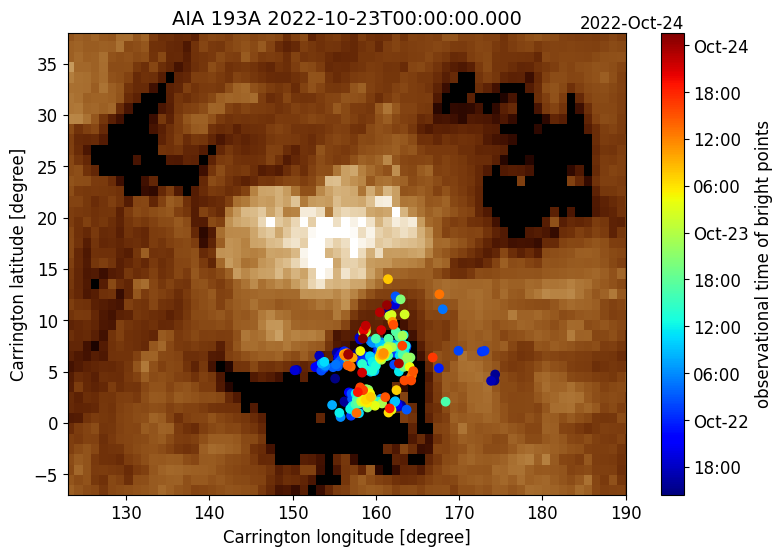

In [85]:
%matplotlib inline
figures_dir = '/Users/chuanpenghou/research/work/MFL_SolO/figures/figures_for_paper/'
import matplotlib.dates as mdates
from datetime import datetime
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

## load AIA193 synoptic map
AIA193_synoptic_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_synoptic/'
AIA193_synoptic_filename = 'CRMAP_SDO360_AIA193_20221023T0000.fits'#'aia193_synmap_cr2261.fits'

image_file = get_pkg_data_filename(AIA193_synoptic_dir+AIA193_synoptic_filename)
image_data = fits.getdata(image_file, ext=0)
fits.setval(image_file, 'CUNIT2', value='deg')
fits.setval(image_file, 'CTYPE2', value='CRLT-CAR')
AIA193_map = sunpy.map.Map(AIA193_synoptic_dir+AIA193_synoptic_filename)

## plot figure
fig = plt.figure(figsize=(9,6))
sdoaia193 = plt.colormaps['sdoaia193']
plt.rcParams.update({'font.size': 12})
## obtain postion of Earth
from sunpy.coordinates import get_body_heliographic_stonyhurst
import sunpy.coordinates.frames as frames
from astropy.coordinates import SkyCoord
obstime = AIA193_map.date
Earth_Carrington = SkyCoord(get_body_heliographic_stonyhurst('Earth', time=obstime)).transform_to(frames.HeliographicCarrington(observer='earth'))
Earth_lon_Carrington = np.abs(AIA193_map.reference_pixel.x.value)#Earth_Carrington.lon.value
AIA193_map_data = np.hstack((AIA193_map.data[:,int(Earth_lon_Carrington):360],AIA193_map.data[:,0:int(Earth_lon_Carrington)]))
from astropy.visualization import ImageNormalize, SqrtStretch
plt.pcolor(np.linspace(0,360,360),np.linspace(-90,90,180), AIA193_map_data,norm=ImageNormalize(vmin=70, vmax=1e3, stretch=SqrtStretch()),cmap=sdoaia193)


length = bright_points_arr.size
rad2deg = 1.0/np.pi*180
bp_lon_for_plot_arr = np.array([])
bp_lat_for_plot_arr = np.array([])
bp_datetime_for_plot_arr = np.array([])
print('length_of_bright_points_arr: ', length)
for idx in range(0,length,1):
    idx_r20 = np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0]-20))
    datetime_arr_for_cmap = datetime.strptime(bright_points_arr[idx]['obstime'][0][0][0].strip(),'%Y-%m-%dT%H:%M:%S.%f')
#     print(datetime_arr_for_cmap)
    bp_lon_for_plot_arr = np.append(bp_lon_for_plot_arr, bright_points_arr[idx]['p'][0][0][0][0] * rad2deg)
    bp_lat_for_plot_arr = np.append(bp_lat_for_plot_arr, 90 - bright_points_arr[idx]['t'][0][0][0][0] * rad2deg)
    bp_datetime_for_plot_arr = np.append(bp_datetime_for_plot_arr, datetime_arr_for_cmap)
plt.scatter(bp_lon_for_plot_arr, bp_lat_for_plot_arr, c=mdates.date2num(bp_datetime_for_plot_arr),cmap='jet')
cb = plt.colorbar(label='observational time of bright points')
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))
    #     plt.scatter(bright_points_arr[idx].p[idx_r20] * rad2deg, 90 - bright_points_arr[idx].t[idx_r20] * rad2deg, color='red')
# for idx in range(0,length,1):
#     idx_r20 = np.argmin(np.abs(bright_points_arr[idx].r-22))
#     plt.scatter(bright_points_arr[idx].p[0] * rad2deg, 90 - bright_points_arr[idx].t[0] * rad2deg, color='black')
#     plt.scatter(bright_points_arr[idx].p[idx_r20] * rad2deg, 90 - bright_points_arr[idx].t[idx_r20] * rad2deg, color='blue')

# plt.scatter(lon_carring_orbit_arr, lat_carring_orbit_arr, color='blue')
# plt.legend(['brigh points on solar surface','position tracing to source surface','position of SolO projecting to source surface'])
plt.xlabel('Carrington longitude [degree]')
plt.ylabel('Carrington latitude [degree]')

plt.xlim([149,176])
plt.ylim([0,15])

plt.xlim([123,190])
plt.ylim([-7,38])

plt.title('AIA 193A '+ str(obstime),fontsize=14)

plt.savefig(figures_dir+'lon_lat_of_bright_points_on_solar_surface.png', dpi=600, bbox_inches='tight')




In [86]:
bright_points_arr[idx]['r'][0][0][0]

array([ 1.2       ,  1.20701859,  1.21434341,  1.22198738,  1.22995917,
        1.23827742,  1.24696643,  1.25604535,  1.26517722,  1.27473235,
        1.28471738,  1.29515342,  1.30606273,  1.31746768,  1.32939084,
        1.34185481,  1.35488573,  1.36849606,  1.382707  ,  1.39754004,
        1.41301704,  1.42916011,  1.445992  ,  1.46353547,  1.48181179,
        1.50083373,  1.52059037,  1.54104491,  1.56214358,  1.58383702,
        1.60609713,  1.62891781,  1.65230483,  1.67626934,  1.70082321,
        1.72597923,  1.75175075,  1.77815139,  1.80519553,  1.83289781,
        1.86127367,  1.8903388 ,  1.92010944,  1.95060229,  1.98183446,
        2.01382375,  2.04658858,  2.0801473 ,  2.11451914,  2.14972416,
        2.18578245,  2.22271486,  2.26054255,  2.29928741,  2.33897211,
        2.37961962,  2.42125343,  2.46389807,  2.50757771,  2.55231823,
        2.59814528,  2.64508594,  2.69316718,  2.74241681,  2.79286358,
        2.84453649,  2.89746549,  2.95168179,  3.00721613,  3.06

length_of_bright_points_arr:  249


Text(0, 0.5, 'Carrinton latitude [degree]')

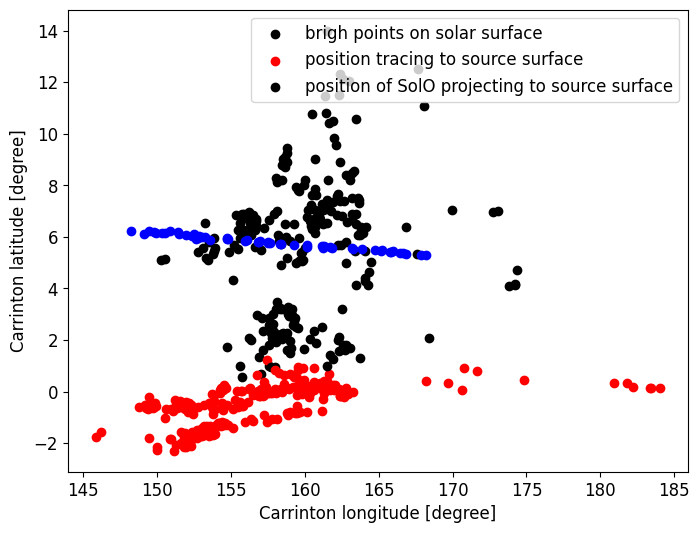

In [87]:
fig = plt.figure(figsize=(8,6))

length = bright_points_arr.size
rad2deg = 1.0/np.pi*180
print('length_of_bright_points_arr: ', length)
for idx in range(0,length,1):
    idx_r20 = np.argmin(np.abs(bright_points_arr[idx]['r'][0][0][0]-20))
    plt.scatter(bright_points_arr[idx]['p'][0][0][0][0] * rad2deg, 90 - bright_points_arr[idx]['t'][0][0][0][0] * rad2deg, color='black')
    plt.scatter(bright_points_arr[idx]['p'][0][0][0][idx_r20] * rad2deg, 90 - bright_points_arr[idx]['t'][0][0][0][idx_r20] * rad2deg, color='red')
# for idx in range(0,length,1):
#     idx_r20 = np.argmin(np.abs(bright_points_arr[idx].r-22))
#     plt.scatter(bright_points_arr[idx].p[0] * rad2deg, 90 - bright_points_arr[idx].t[0] * rad2deg, color='black')
#     plt.scatter(bright_points_arr[idx].p[idx_r20] * rad2deg, 90 - bright_points_arr[idx].t[idx_r20] * rad2deg, color='blue')

plt.scatter(lon_carring_orbit_arr, lat_carring_orbit_arr, color='blue')
plt.legend(['brigh points on solar surface','position tracing to source surface','position of SolO projecting to source surface'])
plt.xlabel('Carrinton longitude [degree]')
plt.ylabel('Carrinton latitude [degree]')


In [88]:
#variables related to SolO orbit: JulDay_orbit_arr, lon_carring_orbit_arr, lat_carring_orbit_arr
# variables related to bright points:
#   datetime_bright_at_ss_arr, lon_bright_at_SS_arr, lat_bright_at_SS_arr, radius_bright_at_SS_arr
def is_solO_in_flux_tube_of_bright_point(x0,y0,r0,x,y):
    r_square = (x - x0)**2 + (y - y0)**2
    if r_square > r0**2: # not in flux tube.
        return 0 
    if r_square <= r0**2:# in flux tube.
        return 1 
length_of_bright_points_reaching_to_SS = datetime_bright_at_ss_arr.size
solo_insect_with_bright_points_arr = np.array([])
for idx in range(length_of_bright_points_reaching_to_SS):
    if not datetime_bright_at_ss_arr[idx] == 0:
        julday_bright_point = julian.to_jd(datetime_bright_at_ss_arr[idx])
        solO_lon_at_bright_point_time = np.interp(julday_bright_point, JulDay_orbit_arr, lon_carring_orbit_arr)
        solO_lat_at_bright_point_time = np.interp(julday_bright_point, JulDay_orbit_arr, lat_carring_orbit_arr)
        lon_bright_point = lon_bright_at_SS_arr[idx]
        lat_bright_point = lat_bright_at_SS_arr[idx]
        radius_bright_point = radius_bright_at_SS_arr[idx]
        solo_insect_with_bright_points = is_solO_in_flux_tube_of_bright_point(lon_bright_point, lat_bright_point, radius_bright_point, solO_lon_at_bright_point_time, solO_lat_at_bright_point_time)
        solo_insect_with_bright_points_arr = np.append(solo_insect_with_bright_points_arr, solo_insect_with_bright_points)
    else:
        solo_insect_with_bright_points_arr = np.append(solo_insect_with_bright_points_arr, 0)

# variables: datetime_bright_at_ss_arr, solo_insect_with_bright_points_arr


[0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194 0.06163194
 0.06163194 0.06163194 0.06163194 0.06163194]


Text(0, 0.5, 'number #')

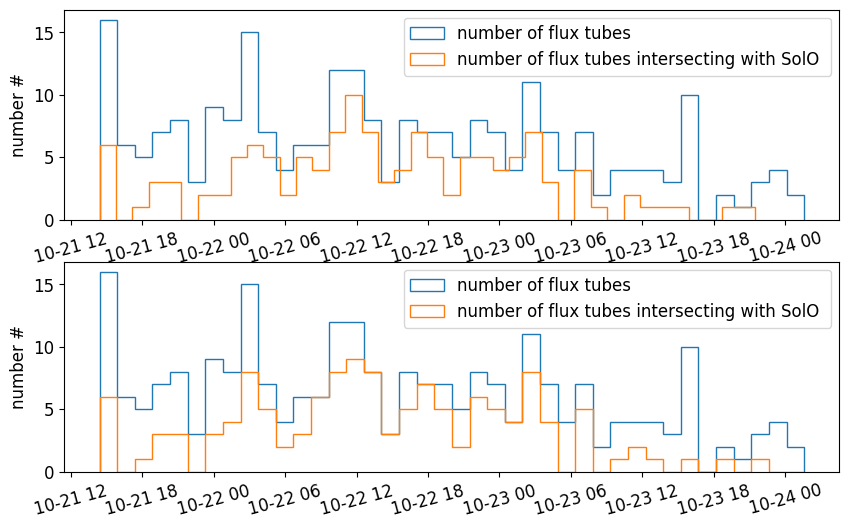

In [89]:
plt.close()
%matplotlib inline
# print(len(solo_insect_with_bright_points_arr))
temp = np.copy(datetime_bright_at_solar_surface_arr) # which dis not plus the delta time.
fig = plt.figure(figsize=(10,6))
# plt.subplot(2,1,1)
# plt.hist(temp, histtype='step', bins=40, label='number of new bright points on the solar surface')
# plt.legend()
# plt.ylim([0,17])
# plt.ylabel('number #')
# plt.xticks(rotation=15)
plt.subplot(2,1,1)
idx = np.where(solo_insect_with_bright_points_arr == 1)   
n,bins,patchs = plt.hist(temp,histtype='step', bins=40, label='number of flux tubes')
print(np.diff(bins))
plt.hist(temp[idx],histtype='step', bins=40,label='number of flux tubes intersecting with SolO ')
plt.legend()
plt.xticks(rotation=15)

# plt.ylim([0,17])
plt.ylabel('number #')
# plt.savefig('/Users/chuanpenghou/Documents/bright_point_number.png',dpi=300)

plt.subplot(2,1,2)
idx = np.where(solo_insect_with_bright_points_arr == 1)   
n1,binss,patchs = plt.hist(temp,histtype='step', bins=40, label='number of flux tubes')

n2,_,patchs=plt.hist(temp[idx], histtype='step', bins=binss, label='number of flux tubes intersecting with SolO ')
plt.legend()
plt.xticks(rotation=15)
# plt.ylim([0,17])
plt.ylabel('number #')
# plt.savefig('/Users/chuanpenghou/Documents/bright_point_number.png',dpi=300)

In [ ]:
0.06163194*86400

<IPython.core.display.Javascript object>


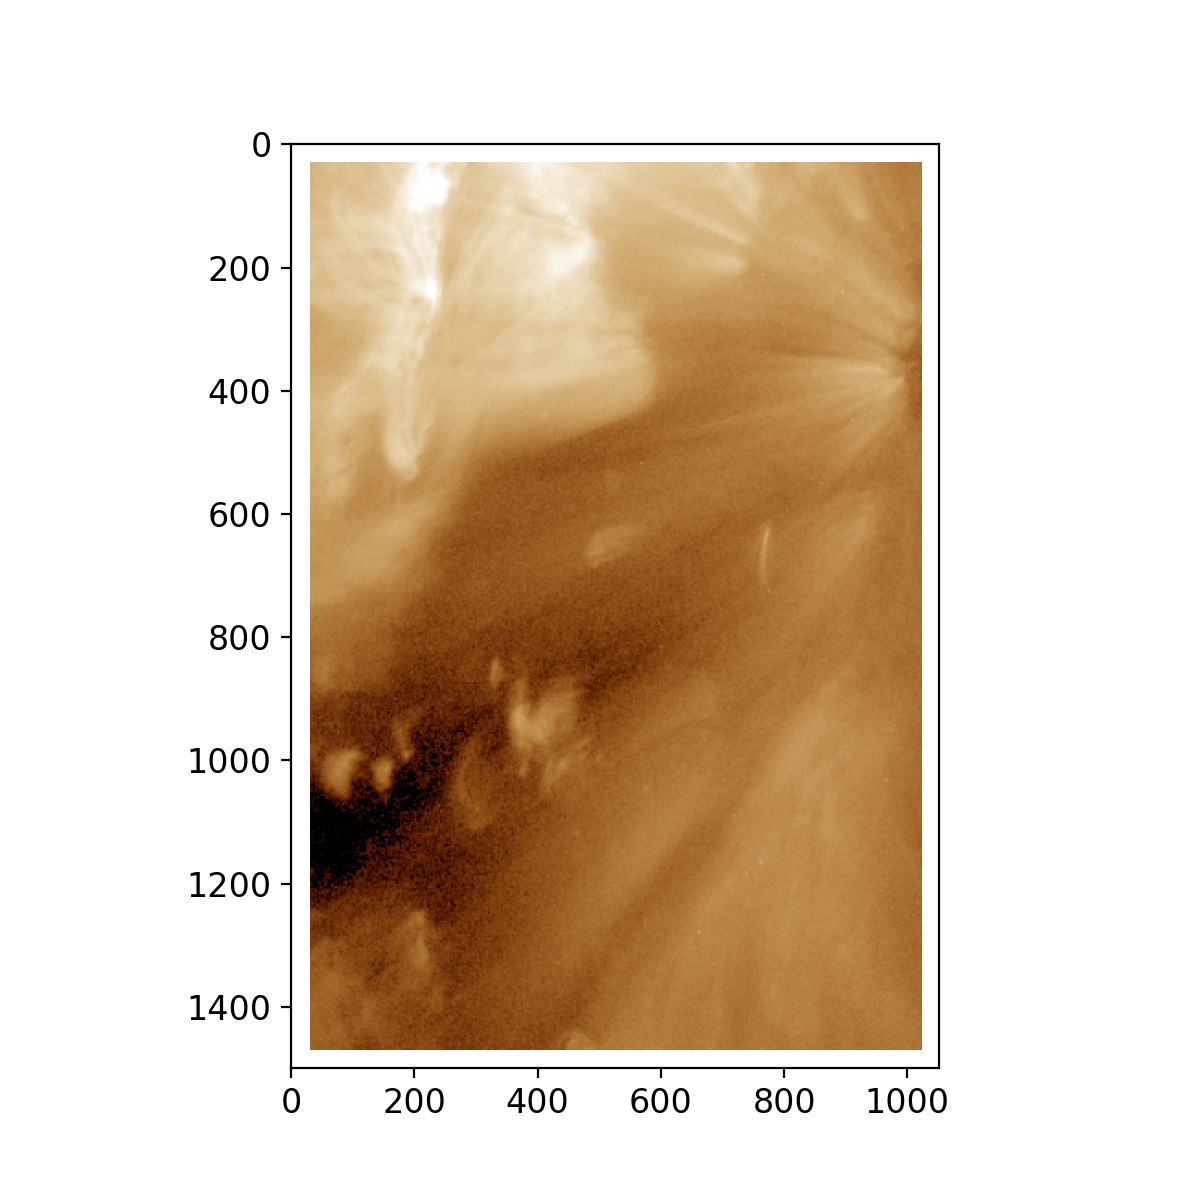

AttributeError: 'numpy.ndarray' object has no attribute 'event_num'

In [66]:
%matplotlib notebook
import cv2
images_data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/figures/AIA_figure/10min_original_images/'
image_filename = 'AIA_193_2022_10_22T03_25_40_image_081.png'  # 0100
image = cv2.imread(images_data_dir+image_filename)

fig = plt.figure(figsize=(6,6))
plt.imshow(image[:,:,1],cmap='sdoaia193', interpolation='nearest', origin='upper')
num = 0
for i in range(249):#idx[0]:
    if (bright_points_arr[i].event_num < 359) & (bright_points_arr[i].event_num > 0) :
        plt.scatter(bright_points_arr[i].x, bright_points_arr[i].y,s=3, c='red',alpha=1)
        num+=1
print(num)
figure_title = datetime.datetime.strptime(image_filename[8:27],'%Y_%m_%dT%H_%M_%S').strftime("%Y-%m-%d %H:%M:%S")
plt.title('AIA193 ' + figure_title)
# xticks = [0,8,16,24,32,40,48,56,64,72,80,88]
# yticks = [0,2,4,6,8]
# plt.gca().set_axis_off()
plt.savefig('/Users/chuanpenghou/research/work/MFL_SolO/figures/figures_for_paper/distribution_of_bright_points.png',dpi=600, bbox_inches='tight')

# ax.xaxis.set_xticks(xticks)
# ax.xaxis.set_yticks(yticks)

In [ ]:
np.shape(image)

In [ ]:
19286.60116716*40

In [67]:
0.06163194
temptemp = np.zeros(temp.size)
for i in range(temp.size):
    temptemp[i] = (temp[i] - temp[0]).days * 86400 + (temp[i] - temp[0]).seconds
np.diff(bins)

array([0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194,
       0.06163194, 0.06163194, 0.06163194, 0.06163194, 0.06163194])

In [ ]:
(temp[200] - temp[0])

In [34]:
0.06163194*86400/3600

1.47916656

In [90]:
import numpy as np
%matplotlib inline
from scipy.io import savemat, loadmat
import datetime
import julian
def filter_sigal_with_wavelet(data_series,data_Epoch):
   

    dat = data_series
    title = 'Solo_Vr'
    label = 'Solo_Vr'
    units = 'km/s'
    t0 = 0
    dt = (data_Epoch[1] - data_Epoch[0]).seconds /3600.0  # In hours
    # dat = smooth(dat,105)
    print('dt: ', dt)
    N = dat.size
    t = numpy.arange(0, N) * dt + t0
    p = numpy.polyfit(t - t0, dat, 1)
    background_value_arr = numpy.polyval(p, t - t0)
    dat_notrend = dat - background_value_arr
    std = dat_notrend.std()  # Standard deviation
    var = std ** 2  # Variance
    dat_norm = dat_notrend / std  # Normalized dataset
    t = data_Epoch

    alpha = np.corrcoef(dat[:-1],dat[1:])[0,1]

    mwt = wavelet.Morlet(6)
    # s0, s1 = 0.1, 1.0*16  # min & max scales
    # num_periods = 32
    # periods = np.logspace(np.log10(s0), np.log10(s1), num_periods)
    # freqs = 1.0 / periods
    dj = 1.0/12
    J  = 5#14#50
    s0 = 6.1#5.0#3.6
    mother = mwt
    # wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, wavelet=mwt, freqs=freqs)
    wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                          mother)
    iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std# + background_value_arr
    return iwave

def from_julian_to_datetime(julian_time_arr):
    datetime_arr = np.array([])
    for julian_time in julian_time_arr:
        datetime_arr = np.append(datetime_arr,julian.from_jd(julian_time))
    return datetime_arr
# data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
# # mdict = {'current_number_of_bright_points': current_number_of_bright_points}
# dir_and_filename = data_dir +'10min_current_number_of_bright_points.mat'
# data = loadmat(dir_and_filename)

dt:  1.478888888888889
number of bright points in each period:  23.0
number of bright points in each period:  43.0
number of bright points in each period:  44.0
number of bright points in each period:  38.0
number of bright points in each period:  33.0
number of bright points in each period:  17.0
number of bright points in each period:  19.0


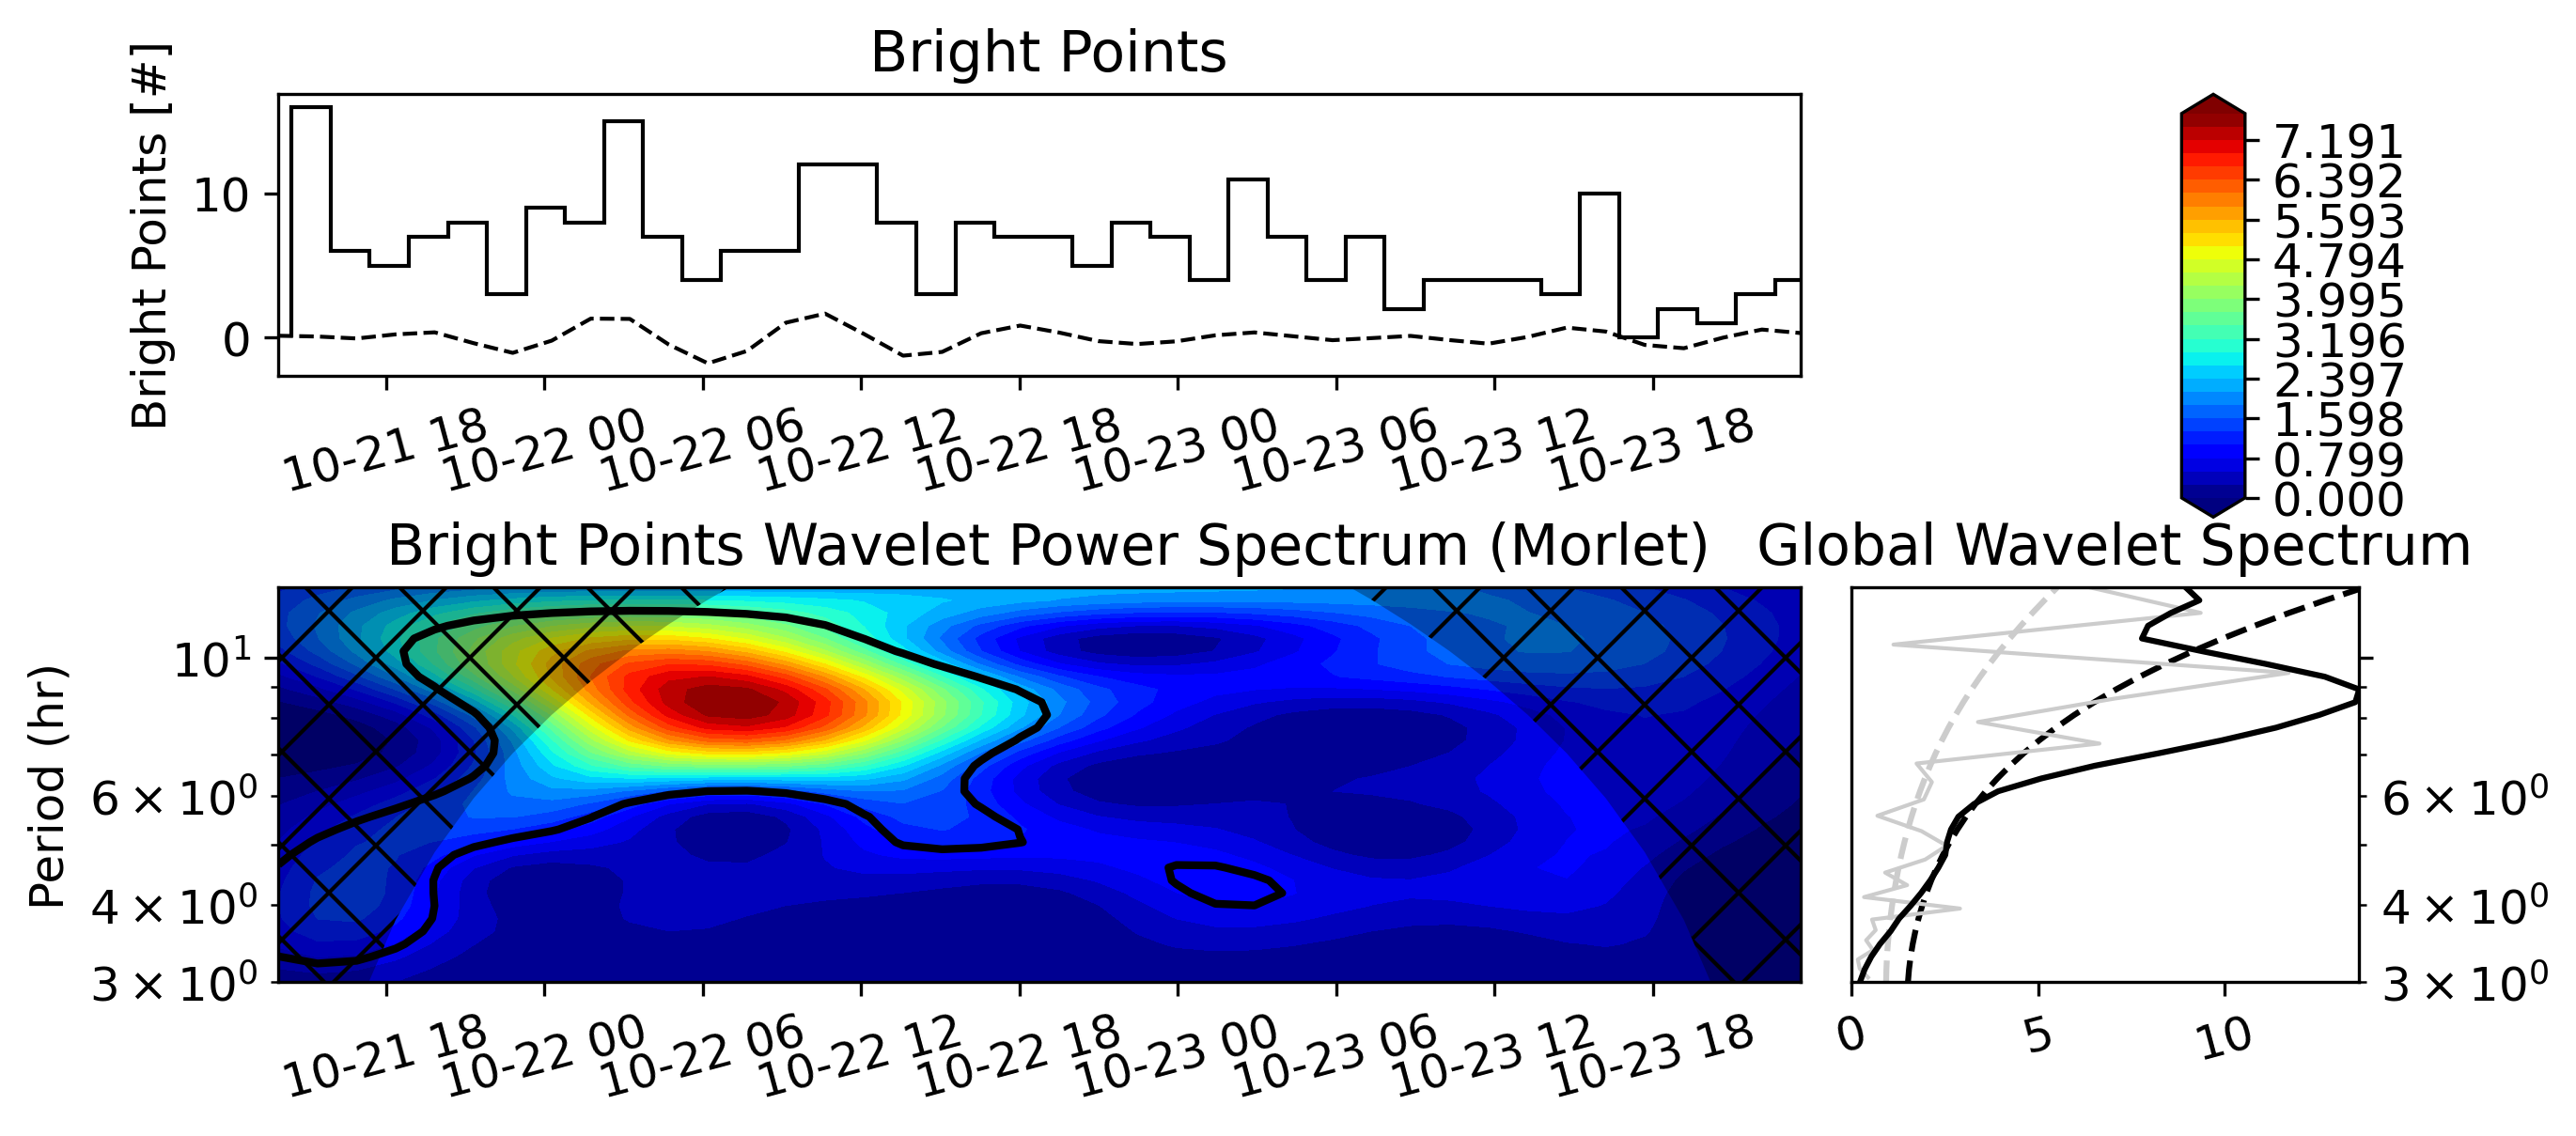

In [91]:

%matplotlib inline
"""
In this example we will load the NINO3 sea surface temperature anomaly dataset
between 1871 and 1996. This and other sample data files are kindly provided by
C. Torrence and G. Compo at
<http://paos.colorado.edu/research/wavelets/software.html>.

"""
# beg_datetime = datetime.datetime(2022,10,21,13,55,40)
# beg_julian = julian.to_jd(beg_datetime)
# time_plot_arr = beg_julian + np.array(range(current_number_of_bright_points.size))*10.0 / 60.0 / 24.0
# We begin by importing the relevant libraries. Please make sure that PyCWT is
# properly installed in your system.
from __future__ import division
import numpy
from matplotlib import pyplot
index_min = 0
index_max = 4700
import pycwt as wavelet
from pycwt.helpers import find
# print((data))
current_number_of_bright_points = n1
beg_datetime = datetime.datetime(2022,10,21,13,55,40)
beg_julian = julian.to_jd(beg_datetime)

dat = current_number_of_bright_points
title = 'Bright Points'
label = 'Bright Points'
units = '#'
t0 = 0
dt = 5324.999616/3600.0  # In hours
time_plot_arr = beg_julian + np.array(range(current_number_of_bright_points.size)) * dt / 24

N = dat.size
dat = dat.reshape(N)
t = numpy.arange(0, N) * dt + t0
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
dat = smooth(dat,2)
p = numpy.polyfit(t - t0, dat, 1)
background_value_arr = numpy.polyval(p, t - t0)
dat_notrend = dat - background_value_arr
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
t = from_julian_to_datetime(time_plot_arr[index_min:index_max])
# alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise
alpha = np.corrcoef(dat[:-1],dat[1:])[0,1]
mwt = wavelet.Morlet(6)
s0, s1 = 3, 1.0*13  # min & max scales
num_periods = 32
periods = np.logspace(np.log10(s0), np.log10(s1), num_periods)
freqs = 1.0 / periods

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, wavelet=mwt, freqs=freqs)

iwave = filter_sigal_with_wavelet(dat,t)
## find valleys of iwave
iwave_valley_index, _ = find_peaks(-iwave, prominence=0.1)
## calculate the number of bright points in each period
for i in range(len(iwave_valley_index)-1):
    cluster = current_number_of_bright_points[iwave_valley_index[i]:iwave_valley_index[i+1]]
    print('number of bright points in each period: ', np.sum(cluster))
# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1.0 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mwt)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# Then, we calculate the global wavelet spectrum and determine its
# significance level.
consider_coi = True
power_for_global = np.copy(power)
if consider_coi:
    for i in range(periods.size):
        coi_data_index = coi < periods[i]
        power_for_global[i,coi_data_index] =np.nan

glbl_power = np.nanmean(power_for_global,axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mwt)
# Prepare the figure
pyplot.close('all')
# pyplot.ioff()
figprops = dict(figsize=(9, 5), dpi=300)
fig = pyplot.figure(**figprops)
fig.subplots_adjust(wspace=0.3)
# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.6, 0.60, 0.2])
plt.hist(temp,histtype='step', bins=40, label='number of flux tubes',color='black')

# ax.plot(t, dat, 'k', linewidth=1.5)
ax.plot(t, iwave, 'k--', linewidth=1.0)
# ax.plot(t[iwave_valley_index],iwave[iwave_valley_index],'*')
ax.set_title(' {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))
pyplot.xticks(rotation=15)

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.17, 0.60, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
# levels = np.logspace(np.log10(np.nanmax(power))/2, np.log10(np.nanmax(power)), 30)
levels = np.linspace(np.nanmax(power)/30000,np.nanmax(power),30)
a = bx.contourf(t, (period), power, (levels),
            extend='both', cmap='jet')
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, (period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] , t[-1:] ,
                           t[:1] , t[:1] ]),
        numpy.concatenate([(coi), [1e-9], (period[-1:]),
                           (period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title(' {} Wavelet Power Spectrum ({})'.format(label, mwt.name))
bx.set_ylabel('Period (hr)')
pyplot.xticks(rotation=15)
cax = pyplot.axes([0.85, 0.5, 0.025, 0.3])
pyplot.colorbar(a,cax=cax)

#
Yticks = 2 ** numpy.arange(numpy.ceil((period.min())),
                           numpy.ceil((period.max())))
# bx.set_yticks(numpy.log2(Yticks))
# bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.72, 0.17, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, (period), 'k--')
cx.plot(var * fft_theor, (period), '--', color='#cccccc')
cx.plot(var * fft_power, (1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, (period), 'k-', linewidth=1.5)
cx.set_title(' Global Wavelet Spectrum')
# cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.yaxis.set_ticks_position('right')
# cx.set_ylabel(r'period (hr)'.format(units),loc='center')
cx.set_xlim([0, glbl_power.max() * var])
cx.set_ylim(([period.min(), period.max()]))
pyplot.xticks(rotation=15)
# cx.set_xscale('log')
# cx.set_yticks(numpy.log2(Yticks))
# cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)
pyplot.yscale('log')

# pyplot.show()
plt.savefig('/Users/chuanpenghou/research/work/MFL_SolO/figures/figures_for_paper/wavelet_period_of_bright_point_number.png',dpi=300, bbox_inches='tight')



dt:  1.478888888888889
number of bright points in each period:  7.0
number of bright points in each period:  22.0
number of bright points in each period:  34.0
number of bright points in each period:  22.0
number of bright points in each period:  27.0
number of bright points in each period:  9.0


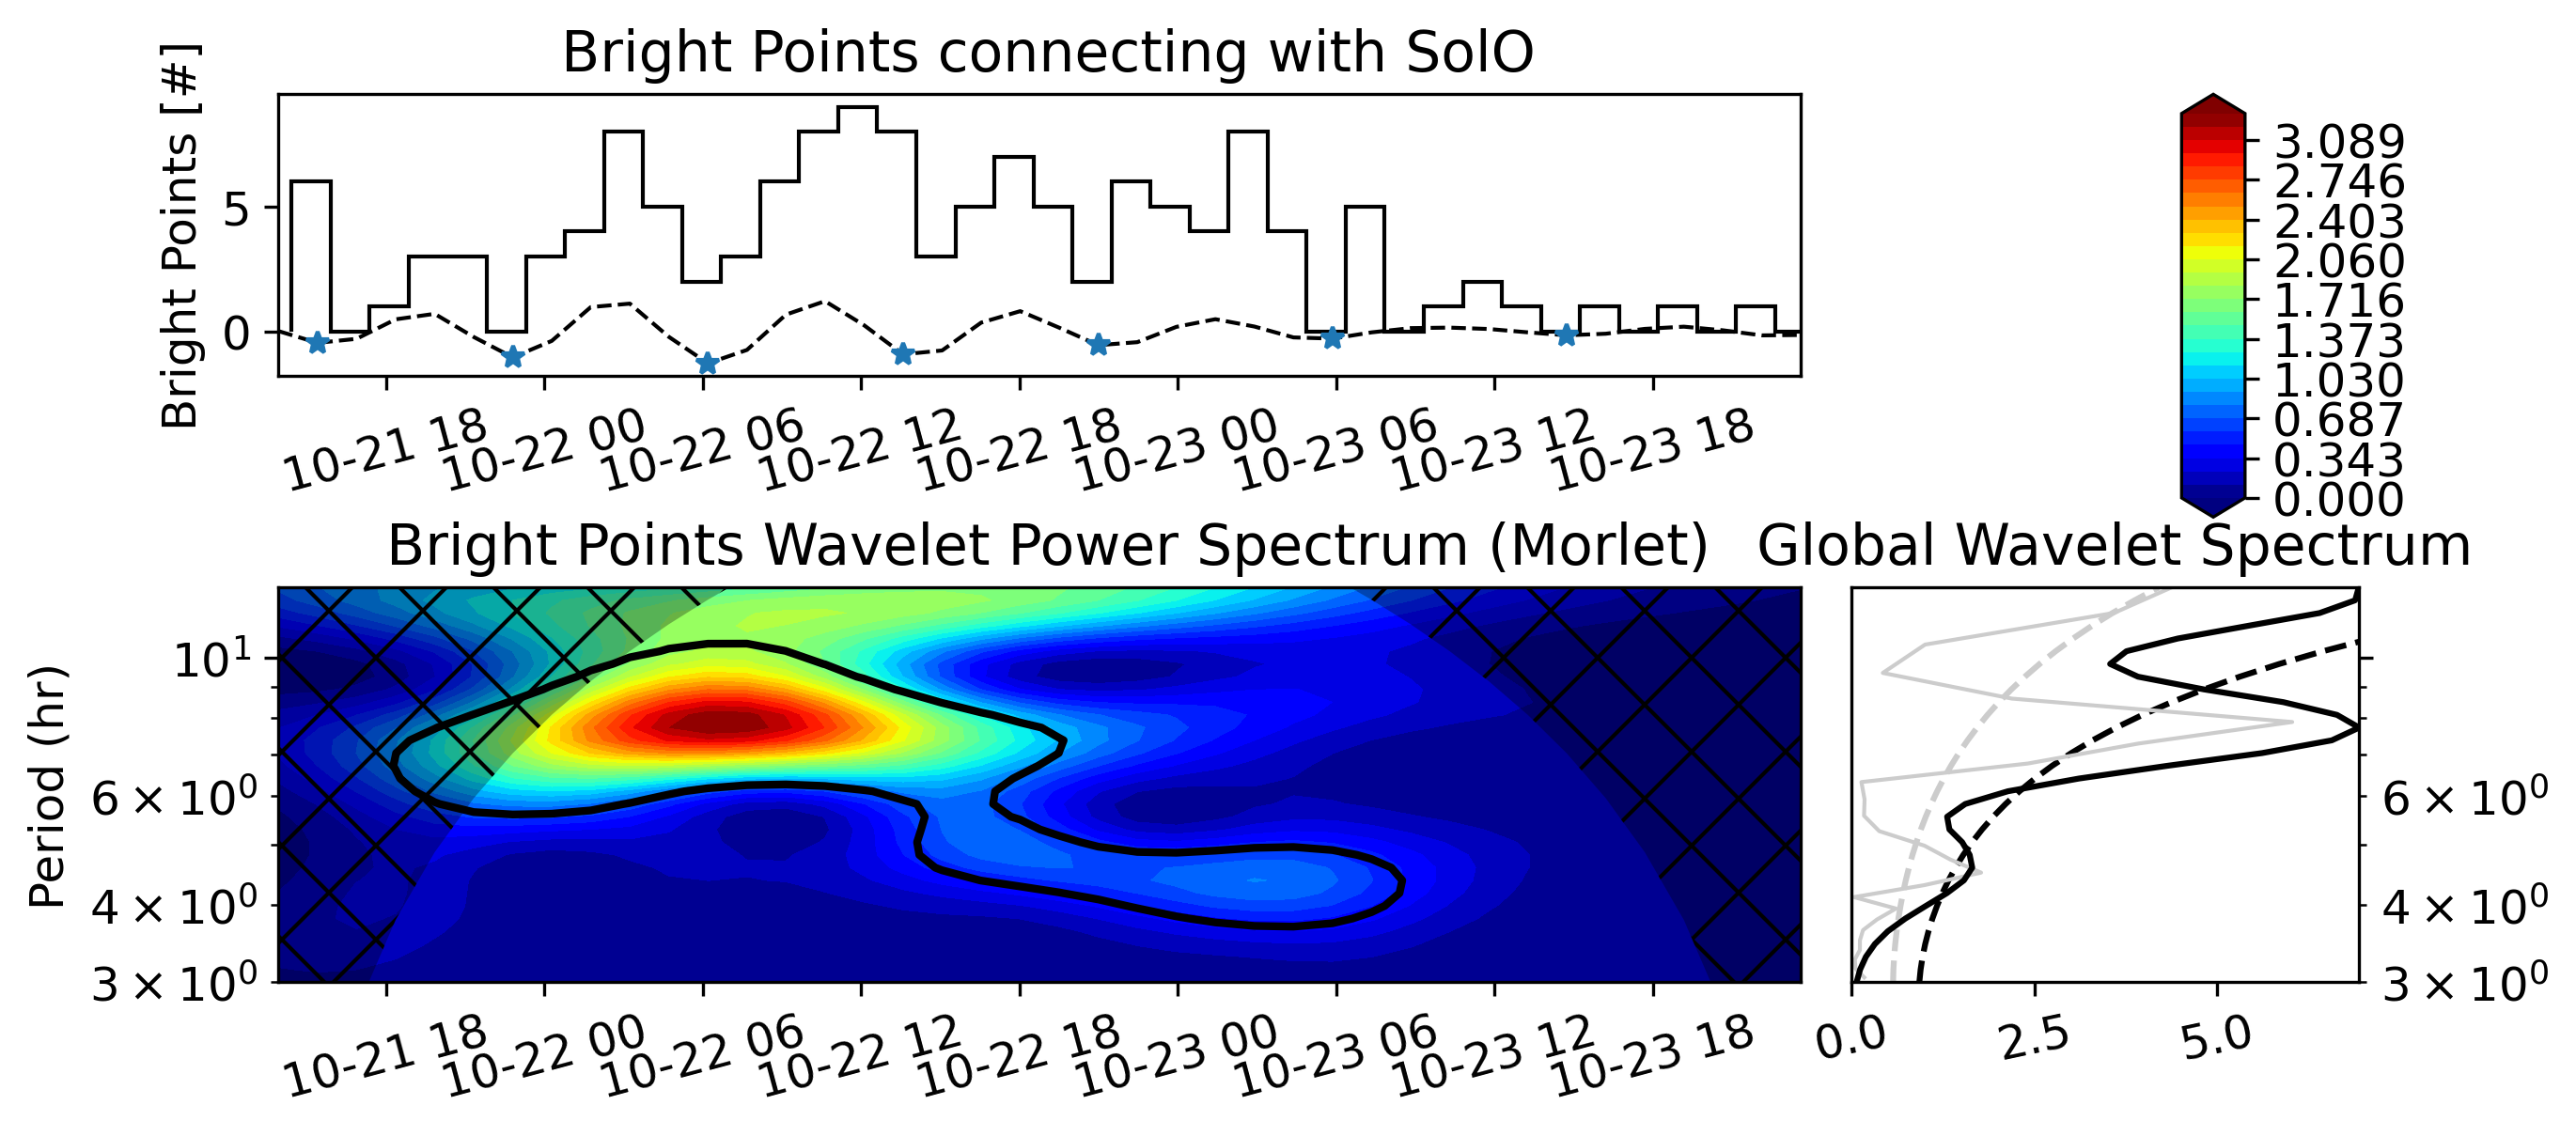

<Figure size 640x480 with 0 Axes>

In [92]:

%matplotlib inline
"""
In this example we will load the NINO3 sea surface temperature anomaly dataset
between 1871 and 1996. This and other sample data files are kindly provided by
C. Torrence and G. Compo at
<http://paos.colorado.edu/research/wavelets/software.html>.

"""
# beg_datetime = datetime.datetime(2022,10,21,13,55,40)
# beg_julian = julian.to_jd(beg_datetime)
# time_plot_arr = beg_julian + np.array(range(current_number_of_bright_points.size))*10.0 / 60.0 / 24.0
# We begin by importing the relevant libraries. Please make sure that PyCWT is
# properly installed in your system.
from __future__ import division
import numpy
from matplotlib import pyplot
index_min = 0
index_max = 4700
import pycwt as wavelet
from pycwt.helpers import find
# print((data))
current_number_of_bright_points = n2
beg_datetime = datetime.datetime(2022,10,21,13,55,40)
beg_julian = julian.to_jd(beg_datetime)

dat = current_number_of_bright_points
title = 'Bright Points'
label = 'Bright Points'
units = '#'
t0 = 0
dt = 5324.975/3600.0  # In hours
time_plot_arr = beg_julian + np.array(range(current_number_of_bright_points.size)) * dt / 24
N = dat.size
dat = dat.reshape(N)
t = numpy.arange(0, N) * dt + t0
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
dat = smooth(dat,2)
p = numpy.polyfit(t - t0, dat, 1)
background_value_arr = numpy.polyval(p, t - t0)
dat_notrend = dat - background_value_arr
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
t = from_julian_to_datetime(time_plot_arr[index_min:index_max])
# alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise
alpha = np.corrcoef(dat[:-1],dat[1:])[0,1]
mwt = wavelet.Morlet(6)
s0, s1 = 3, 1.0*13  # min & max scales
num_periods = 32
periods = np.logspace(np.log10(s0), np.log10(s1), num_periods)
freqs = 1.0 / periods

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, wavelet=mwt, freqs=freqs)

iwave = filter_sigal_with_wavelet(dat,t)
## find valleys of iwave
iwave_valley_index, _ = find_peaks(-iwave, prominence=0.1)
## calculate the number of bright points in each period
for i in range(len(iwave_valley_index)-1):
    cluster = current_number_of_bright_points[iwave_valley_index[i]:iwave_valley_index[i+1]]
    print('number of bright points in each period: ', np.sum(cluster))
# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1.0 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mwt)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# Then, we calculate the global wavelet spectrum and determine its
# significance level.
consider_coi = True
power_for_global = np.copy(power)
if consider_coi:
    for i in range(periods.size):
        coi_data_index = coi < periods[i]
        power_for_global[i,coi_data_index] =np.nan

glbl_power = np.nanmean(power_for_global,axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mwt)
# Prepare the figure
pyplot.close('all')
# pyplot.ioff()
figprops = dict(figsize=(9, 5), dpi=300)
fig = pyplot.figure(**figprops)
fig.subplots_adjust(wspace=0.3)
# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.6, 0.60, 0.2])
plt.hist(temp[idx],histtype='step', bins=binss, label='number of flux tubes',color='black')

# ax.plot(t, dat, 'k', linewidth=1.5)
ax.plot(t, iwave, 'k--', linewidth=1.0)
ax.plot(t[iwave_valley_index],iwave[iwave_valley_index],'*')
ax.set_title(' {} connecting with SolO'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))
pyplot.xticks(rotation=15)

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.17, 0.60, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
# levels = np.logspace(np.log10(np.nanmax(power))/2, np.log10(np.nanmax(power)), 30)
levels = np.linspace(np.nanmax(power)/30000,np.nanmax(power),30)
a = bx.contourf(t, (period), power, (levels),
            extend='both', cmap='jet')
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, (period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] , t[-1:] ,
                           t[:1] , t[:1] ]),
        numpy.concatenate([(coi), [1e-9], (period[-1:]),
                           (period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title(' {} Wavelet Power Spectrum ({})'.format(label, mwt.name))
bx.set_ylabel('Period (hr)')
pyplot.xticks(rotation=15)
cax = pyplot.axes([0.85, 0.5, 0.025, 0.3])
pyplot.colorbar(a,cax=cax)
  
#
Yticks = 2 ** numpy.arange(numpy.ceil((period.min())),
                           numpy.ceil((period.max())))
# bx.set_yticks(numpy.log2(Yticks))
# bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.72, 0.17, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, (period), 'k--')
cx.plot(var * fft_theor, (period), '--', color='#cccccc')
cx.plot(var * fft_power, (1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, (period), 'k-', linewidth=1.5)
cx.set_title(' Global Wavelet Spectrum')
# cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.yaxis.set_ticks_position('right')
# cx.set_ylabel(r'period (hr)'.format(units),loc='center')
cx.set_xlim([0, glbl_power.max() * var])
cx.set_ylim(([period.min(), period.max()]))
pyplot.xticks(rotation=12)
# cx.set_xscale('log')
# cx.set_yticks(numpy.log2(Yticks))
# cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)
pyplot.yscale('log')

pyplot.show()
plt.savefig('/Users/chuanpenghou/research/work/MFL_SolO/figures/figures_for_paper/wavelet_period_of_bright_point_number_connecting_with_SolO.png',dpi=300, bbox_inches='tight')



datetime.timedelta(seconds=5324, microseconds=974980)

In [ ]:
iwave_valley_index, _ = find_peaks(-iwave, prominence=0.1)
iwave_valley_index
plt.plot(iwave,'-')
plt.plot(n2)
plt.plot(iwave_valley_index,iwave[iwave_valley_index],'*')
for i in range(len(iwave_valley_index)-1):
#     print(iwave_valley_index[i],iwave_valley_index[i+1])
    cluster = n2[iwave_valley_index[i]:iwave_valley_index[i+1]]
    print(np.sum(cluster))

<IPython.core.display.Javascript object>


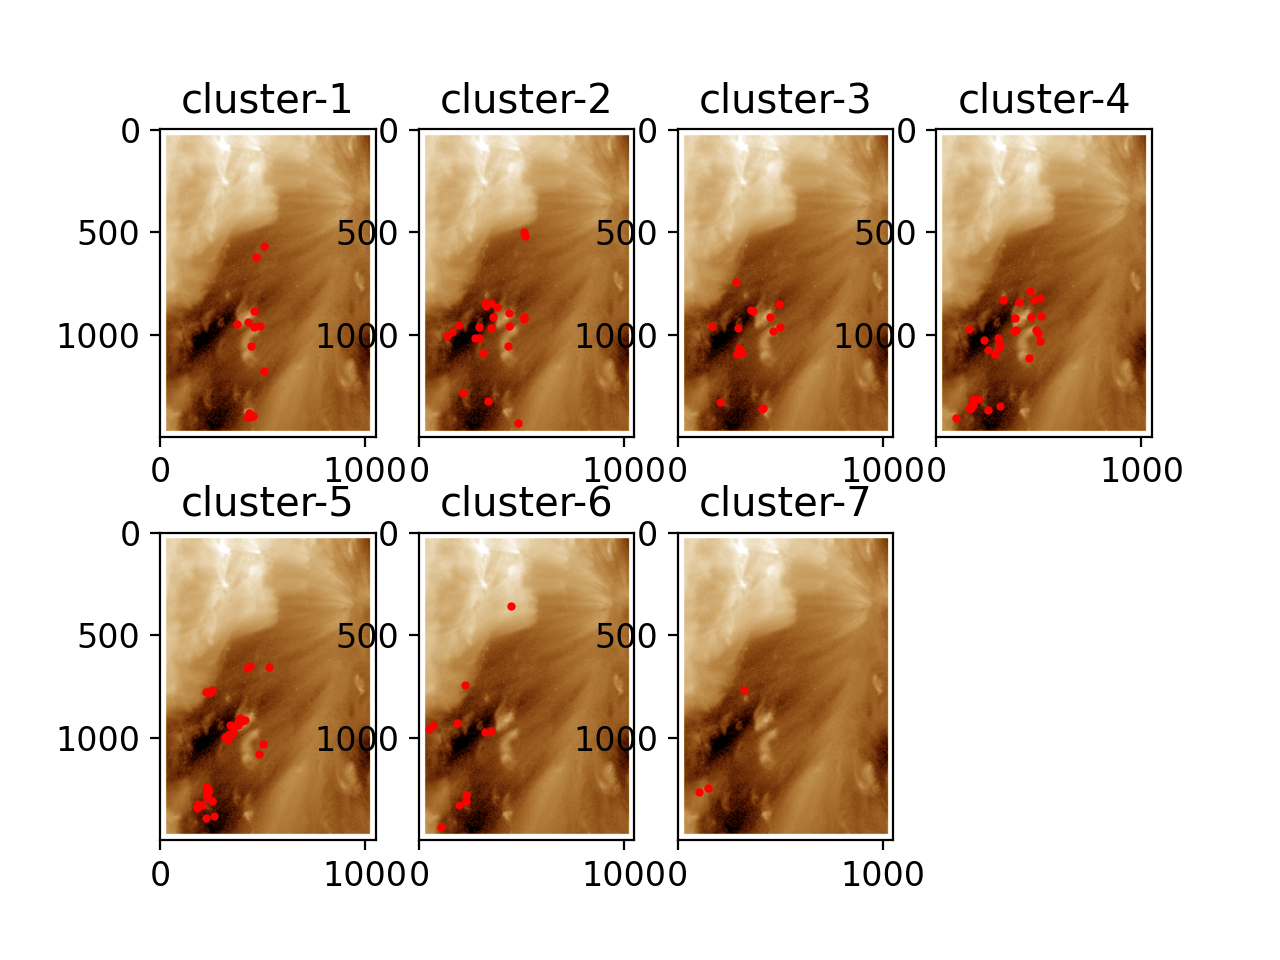

/var/folders/s9/m53zx_9d4tv83k293kp2qrg00000gp/T/ipykernel_87765/279611929.py:56: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



13
24
15
30
34
11
3


In [60]:
# load information of bright points
from scipy.io import savemat, loadmat
import cv2

data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
# mdict = {'current_number_of_bright_points': current_number_of_bright_points}
dir_and_filename = data_dir +'10min_information_of_bright_points.mat'
data = loadmat(dir_and_filename)
new_BP = data['information_of_new_bright_points_for_each_frame_arr'][0]
disappeared_BP = data['information_of_disappearing_bright_points_for_each_frame_arr'][0]

%matplotlib notebook
images_data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/figures/AIA_figure/10min_original_images/'
image_filename = 'AIA_193_2022_10_21T13_55_40_image_00.png'
image = cv2.imread(images_data_dir+image_filename)
plt.imshow(image[:,:,1],cmap='sdoaia193')

new_number_BP_arr = np.array([])
disappeared_number_BP_arr = np.array([])
bright_point_num = 0

sequenceidx_arr = np.array([])
for i in range(new_BP.size):
    new_number_BP_arr =  np.append(new_number_BP_arr,new_BP[i]['number'])
    disappeared_number_BP_arr =  np.append(disappeared_number_BP_arr,disappeared_BP[i]['number'])
    new_x = new_BP[i]['x'][0][0]
    new_y = new_BP[i]['y'][0][0]
    disappeared_x = disappeared_BP[i]['x'][0][0]
    disappeared_y = disappeared_BP[i]['y'][0][0]
    sequence_idx = np.array([])
    sequenceidx = Munch()
    for j in range(int(new_BP[i]['number'])):
        sequence_idx = np.append(sequence_idx, bright_point_num)
        bright_point_num = bright_point_num + 1
    sequenceidx.idx = sequence_idx
#     print(sequence_idx)
    sequenceidx_arr = np.append(sequenceidx_arr,sequenceidx)

initial_number = 10
number = new_number_BP_arr-disappeared_number_BP_arr
current_number_of_bright_points = np.array([])
for i in range(len(number)):
    current_number_of_bright_points = np.append(current_number_of_bright_points
                                                ,np.sum(number[:i])+initial_number)


BP_number_for_find_peaks = current_number_of_bright_points[0:]

peaks, properties = find_peaks(-BP_number_for_find_peaks, prominence=(5,None)) # 5
# peaks = np.copy(iwave_valley_index)
peaks = np.append(0,peaks)
peaks = np.append(peaks,len(BP_number_for_find_peaks))

plt.imshow(image[:,:,1],cmap='sdoaia193')
for j in range(1,8):
    plt.subplot(2,4,j)
    plt.imshow(image[:,:,1],cmap='sdoaia193')
    num = 0 
    for i in range(peaks[j-1],peaks[j]):#range(new_BP.size):
        new_x = new_BP[i]['x'][0][0]
        new_y = new_BP[i]['y'][0][0]
        disappeared_x = disappeared_BP[i]['x'][0][0]
        disappeared_y = disappeared_BP[i]['y'][0][0]
        new_radius = new_BP[i]['radius'][0][0]
        disappeared_radius = disappeared_BP[i]['radius'][0][0]
#         plt.scatter(new_x,new_y,s=4,c='r')
#         plt.scatter(disappeared_x,disappeared_y,s=4,c='k')
#         print(new_x,new_x.size)
        idx_temp = sequenceidx_arr[i].idx
        for number in range(int(new_BP[i]['number'])):
            if solo_insect_with_bright_points_arr[int(idx_temp[number])] == 1:
                plt.scatter(new_x[0][number],new_y[0][number],s=4,c='r')
                num = num + 1
           
    plt.title('cluster-'+str(j))
#     plt.xlim([460,1456])
#     plt.xlim([0,1440])
    print(num)
#         plt.scatter(disappeared_x,disappeared_y,s=4,c='b',alpha=0.5)
    
# plt.plot(BP_number_for_find_peaks)
# plt.plot(peaks,BP_number_for_find_peaks[peaks],"x")

# plt.vlines(x=peaks, ymin=BP_number_for_find_peaks[peaks] - properties["prominences"],
#            ymax = BP_number_for_find_peaks[peaks], color = "C1")
# # plt.hlines(y=properties["prominences"], xmin=properties["left_bases"],
# #            xmax=properties["right_bases"], color = "C1")
# plt.show()
# plt.xlabel('time')
# plt.ylabel('number of bright points')
# plt.xticks(rotation=15)
# plt.title('dt = 10 minutes')
# print(properties['prominences'])
# plt.xlim([0,1920])
# plt.ylim([0,1440])


In [ ]:
9.  4.  0. 20. 14. 25. 14. 20.  5.

In [61]:
temp[idx]

array([datetime.datetime(2022, 10, 21, 14, 25, 40, 842993),
       datetime.datetime(2022, 10, 21, 15, 5, 40, 842971),
       datetime.datetime(2022, 10, 21, 15, 15, 40, 842975),
       datetime.datetime(2022, 10, 21, 15, 15, 40, 842975),
       datetime.datetime(2022, 10, 21, 15, 35, 40, 842984),
       datetime.datetime(2022, 10, 21, 15, 45, 40, 842989),
       datetime.datetime(2022, 10, 21, 18, 15, 40, 842975),
       datetime.datetime(2022, 10, 21, 18, 55, 40, 842993),
       datetime.datetime(2022, 10, 21, 19, 5, 40, 842957),
       datetime.datetime(2022, 10, 21, 19, 15, 40, 842962),
       datetime.datetime(2022, 10, 21, 20, 45, 40, 843002),
       datetime.datetime(2022, 10, 21, 20, 45, 40, 843002),
       datetime.datetime(2022, 10, 21, 20, 55, 40, 843006),
       datetime.datetime(2022, 10, 21, 23, 35, 40, 842998),
       datetime.datetime(2022, 10, 21, 23, 45, 40, 843002),
       datetime.datetime(2022, 10, 22, 0, 5, 40, 842971),
       datetime.datetime(2022, 10, 22, 1, 25

In [ ]:
from_cu_to_mks = 481.3711 # km/s
plt.plot(mag_r,Vswr+Va,color='black')
# plt.plot(pos_r[0:len(pos_r)],Va_mks,color='blue')
# plt.plot(pos_r[0:len(pos_r)],Vsw_mks+Va_mks,color='red')

In [ ]:
from scipy.io import savemat, loadmat
data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
dir_and_filename = data_dir +'10min_information_of_bright_points.mat'
data = loadmat(dir_and_filename)
new_BP = data['information_of_new_bright_points_for_each_frame_arr'][0]

In [ ]:
new_BP.size

In [ ]:
for i in range(bright_points_arr.size):
    br = bright_points_arr[i].br
    bt = bright_points_arr[i].bt
    bp = bright_points_arr[i].bp
    B_total = np.sqrt(br**2 + bt**2 + bp**2)
    expansion_factor = B_total/B_total[-1]
    bright_points_arr[i].expansion_factor = expansion_factor

In [ ]:
import julian
from datetime import datetime
temp = bright_points_arr[0].obstime
# temp.to_numpy()
d= datetime.strptime(temp.strip(), '%Y-%m-%dT%H:%M:%S.%f')
julian.to_jd(d)

In [ ]:
data_dir = '/Users/chuanpenghou/research/work/MFL_SolO/AIA_data/'
mdict = {'bright_points_arr': bright_points_arr}
dir_and_filename = data_dir +'PSI_trace_from_bright_points_arr.mat'
savemat(dir_and_filename, mdict) 

In [ ]:
214.9 * 6.96e5

In [ ]:
!open /Users/chuanpenghou/research/work/MFL_SolO/figures/